**Purpose:** To do QTL analysis of EPM results. Now using new chromosome names (from April 2016). 

####Plotting settings

In [ ]:
# python standard
import os

# third party
import numpy as np
import pandas as pd
import seaborn as sns
import tzlocal
from pylab import rcParams
from matplotlib import pyplot
%matplotlib inline
import rpy2.robjects as robjects

%load_ext rpy2.ipython

In [ ]:
rcParams['figure.figsize'] = 22, 7
rcParams['axes.titlesize'] = 20
rcParams['xtick.labelsize'] = 18
rcParams['ytick.labelsize'] = 14
rcParams['legend.fontsize'] = 14
rcParams['axes.formatter.useoffset'] = False

####Directory structure

In [ ]:
msg_data_path = '/n/holylfs/LABS/hoekstra_lab/hoekstrafs3/bendesky/genotyping/msg/'
lib_path = '/n/holylfs/LABS/hoekstra_lab/hoekstrafs3/bendesky/genotyping/physical_map/lib'

####Files/paths

In [ ]:
msg_run = os.path.join(msg_data_path, '20151111')
combine_dir = os.path.join(msg_run, 'combine-difffac_0.1')
rqtl_dir = os.path.join(msg_run, 'rqtl', 'EPM')

# Files for rqtl
cross_path = os.path.join(rqtl_dir, 'cross_EPM_newChromNames_2017.RData')
# Files for read.cross.msg
read_cross_file1 = os.path.join(combine_dir, 'ancestry-probs-par2.tsv.sorted.csv')
read_cross_file2 = os.path.join(combine_dir, 'ancestry-probs-par2.tsv.sorted.pulled.converted.thinned.f2_rqtl')
EPM_pheno_file = '/n/holylfs/LABS/hoekstra_lab/hoekstrafs3/EPM/results/rqtl_epm_pheno_file.csv'
ancfile_par1 = os.path.join(combine_dir, 'ancestry-probs-par1.tsv.sorted.pulled.converted.thinned.f2_rqtl')

In [ ]:
cross_path = 'cross_EPM_newChromNames_2017.RData'

####Libraries

In [ ]:
r_package_path = os.path.join(lib_path, 'Rpackages')

###Load R/qtl and cross

In [ ]:
%%R
library(qtl)

In [1]:
%%R -i r_package_path
.libPaths(c(.libPaths(), r_package_path))
source('/n/holylfs/LABS/hoekstra_lab/hoekstrafs3/apps/read_cross_msg/read.cross.msg.1.5.R')


In [ ]:
%%R -i read_cross_file1,read_cross_file2,EPM_pheno_file,ancfile_par1
cross <- read.cross.msg(read_cross_file1,read_cross_file2,EPM_pheno_file,ancfile.par1=ancfile_par1)

####Save cross

In [8]:
%%R -i cross_path
save(cross, file = cross_path)

____________________

Print summary

In [8]:
%%R
summary(cross)

    F2 intercross

    No. individuals:    1614 

    No. phenotypes:     18 
    Percent phenotyped: 100 98.1 98.1 98.1 98.1 98.1 98.1 98.1 98.1 98.1 90.4 92 
                        97.6 98.1 88.2 98.1 98.1 100 

    No. chromosomes:    24 
        Autosomes:      1 10 11 12 13 14 15 16-21 17 18 19 2 20 22 23 3 4 5 6 7 
                        8a 8b 9 
        X chr:          X 

    Total markers:      51739 
    No. markers:        3680 1806 2183 1950 1134 1704 1529 2228 938 1543 1309 
                        2706 1853 1588 1647 3346 3181 3273 2538 2402 1786 2543 
                        2012 2860 
    Percent genotyped:  98.3 
    Genotypes (%):    
          Autosomes:        AA:23.6      AB:51.6      BB:24.8  not BB:0.0  
                        not AA:0.0  
       X chromosome:        AA:21.2     ABf:19.8     ABr:6.2       BB:1.1  
                            AY:23.8      BY:27.9 


###Check name and order of chromosomes

Get current names of LGs

In [9]:
%%R
chrnames(cross)

 [1] "1"     "10"    "11"    "12"    "13"    "14"    "15"    "16-21" "17"   
[10] "18"    "19"    "2"     "20"    "22"    "23"    "3"     "4"     "5"    
[19] "6"     "7"     "8a"    "8b"    "9"     "X"    


Rename chromosomes according to new agreement from my map and new FISH from Rachel O'Neill in April 2016

In [10]:
%%R
names(cross$geno) <- c(1,2,3,4,5,6,7,16,8,9,10,11,12,13,14,15,21,17,18,19,20,22,23,"X")
chrnames(cross)

 [1] "1"  "2"  "3"  "4"  "5"  "6"  "7"  "16" "8"  "9"  "10" "11" "12" "13" "14"
[16] "15" "21" "17" "18" "19" "20" "22" "23" "X" 


Reorder LGs so they are in a reasonable order

In [11]:
%%R
cross$geno <- cross$geno[c(as.character(1:23),"X")]
chrnames(cross)

 [1] "1"  "2"  "3"  "4"  "5"  "6"  "7"  "8"  "9"  "10" "11" "12" "13" "14" "15"
[16] "16" "17" "18" "19" "20" "21" "22" "23" "X" 


###Remove individuals without genotype or phenotype

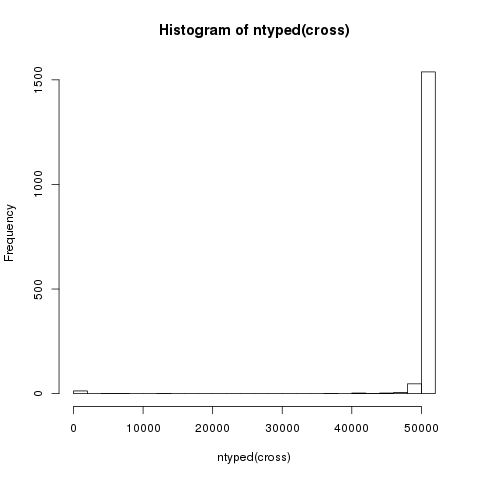

In [12]:
%%R
hist(ntyped(cross), breaks=30)

####Individuals with 0 markers genotyped

In [13]:
%%R
nt <- ntyped(cross)<1
names(nt[nt])

 [1] "indiv2435_DUMMY" "indiv2958_DUMMY" "indiv3081_DUMMY" "indiv3559_DUMMY"
 [5] "indiv3780_DUMMY" "indiv2390_DUMMY" "indiv6274_DUMMY" "indiv6275_DUMMY"
 [9] "indiv6276_DUMMY" "indiv2607_DUMMY" "indiv6711_DUMMY" "indiv2313_DUMMY"
[13] "indiv3218_DUMMY"


####Remove individuals with 0 markers genotyped

In [14]:
%%R
cross <- subset(cross, ind=(ntyped(cross)>0))
# Keeps only individuals with >0 markers genotyped

####Remove individuals without sex information (i.e. those not tested for behavior)

In [15]:
%%R
y <- pull.pheno(cross, 2)
cross <- subset(cross, ind = !is.na(y))

In [16]:
%%R
summary(cross)

    F2 intercross

    No. individuals:    1571 

    No. phenotypes:     18 
    Percent phenotyped: 100 100 100 100 100 100 100 100 100 100 92.2 93.8 99.6 
                        100 89.9 100 100 100 

    No. chromosomes:    24 
        Autosomes:      1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 
                        23 
        X chr:          X 

    Total markers:      51739 
    No. markers:        3680 1806 2183 1950 1134 1704 1529 938 1543 1309 2706 
                        1853 1588 1647 3346 2228 3273 2538 2402 1786 3181 2543 
                        2012 2860 
    Percent genotyped:  99.1 
    Genotypes (%):    
          Autosomes:        AA:23.6      AB:51.6      BB:24.8  not BB:0.0  
                        not AA:0.0  
       X chromosome:        AA:21.3     ABf:19.7     ABr:6.2       BB:0.4  
                            AY:24.1      BY:28.3 


Check chromosome names are correct

In [38]:
chrom_names = robjects.r('chrnames(cross)')
for c in list(chrom_names):
    r_cmd = 'colnames(cross$geno$"%s"$data)[1]' % c
    first_marker = robjects.r(r_cmd)
    print c, first_marker

1 ['1:38523']
2 ['10:4807']
3 ['11:12363']
4 ['12:23451']
5 ['13:628226']
6 ['14:2218']
7 ['15:23631']
8 ['17:27476']
9 ['18:25594']
10 ['19:12521']
11 ['2:10382']
12 ['20:11708']
13 ['22:32790']
14 ['23:22506376']
15 ['3:29314']
16 ['16-21:12509389']
17 ['5:230077']
18 ['6:367']
19 ['7:40669']
20 ['8a:2608']
21 ['4:3206']
22 ['8b:2062']
23 ['9:9413']
X ['X:11968']


Rename chromosomes, don't know why they are wrong

In [39]:
%%R
names(cross$geno) <- c(1,10,11,12,13,14,15,17,18,19,2,20,22,23,3,21,5,6,7,16,4,8,9,"X")
cross$geno <- cross$geno[c(as.character(1:23),"X")]

In [40]:
chrom_names = robjects.r('chrnames(cross)')
for c in list(chrom_names):
    r_cmd = 'colnames(cross$geno$"%s"$data)[1]' % c
    first_marker = robjects.r(r_cmd)
    print c, first_marker

1 ['1:38523']
2 ['2:10382']
3 ['3:29314']
4 ['4:3206']
5 ['5:230077']
6 ['6:367']
7 ['7:40669']
8 ['8b:2062']
9 ['9:9413']
10 ['10:4807']
11 ['11:12363']
12 ['12:23451']
13 ['13:628226']
14 ['14:2218']
15 ['15:23631']
16 ['8a:2608']
17 ['17:27476']
18 ['18:25594']
19 ['19:12521']
20 ['20:11708']
21 ['16-21:12509389']
22 ['22:32790']
23 ['23:22506376']
X ['X:11968']


Save cross

In [41]:
%%R -i cross_path
save(cross, file = cross_path)

--------------

####Load previously saved cross

In [11]:
%%R -i cross_path
load(cross_path)

#QTL scans

####Phenotypes

In [12]:
print(robjects.r('names(cross$pheno)'))

 [1] "id"                      "sex"                    
 [3] "frac_in_closedAndMiddle" "frac_in_closedArms"     
 [5] "frac_in_middle"          "frac_in_openArms"       
 [7] "entries_to_closed"       "entries_to_open"        
 [9] "distance_in_closed"      "distance_in_open"       
[11] "speed_in_closed"         "speed_in_open"          
[13] "entries_o_c_ratio"       "distance_o_c_ratio"     
[15] "speed_o_c_ratio"         "total_frames"           
[17] "tested_more_than_once"   "pgm"                    
[19] "frac_entries_to_open"    "frac_distance_in_open"  
[21] "log_temp_pheno"         



In [149]:
%%R 
print(typeof(cross))
print(typeof(cross$pheno))
print(typeof(cross$pheno$frac_in_middle))

[1] "list"
[1] "list"
[1] "double"


In [67]:
# test = robjects.r('cross')
# test = robjects.pandas2ri.ri2py_dataframe(miceDF)
# test.head()


In [13]:
# Import data into python

miceDF = robjects.r('cross$pheno')
miceDF = robjects.pandas2ri.ri2py_dataframe(miceDF)
miceDF.head()

/Users/joshfeldman/Desktop/Projects/mice/venv/lib/python3.6/site-packages/rpy2/robjects/pandas2ri.py:191: FutureWarning: from_items is deprecated. Please use DataFrame.from_dict(dict(items), ...) instead. DataFrame.from_dict(OrderedDict(items)) may be used to preserve the key order.
  res = PandasDataFrame.from_items(items)


id sex  frac_in_closedAndMiddle  frac_in_closedArms  \
0  indiv767_DUMMY   F                 0.867611            0.805050   
1  indiv768_DUMMY   M                 0.954012            0.907493   
2  indiv769_DUMMY   M                 0.641230            0.540040   
3  indiv770_DUMMY   F                 0.766712            0.638178   
4  indiv771_DUMMY   M                 0.815090            0.733981   

   frac_in_middle  frac_in_openArms  entries_to_closed  entries_to_open  \
0        0.062562          0.074793               33.0              7.0   
1        0.046519          0.011955               10.0              1.0   
2        0.101189          0.323936               43.0             36.0   
3        0.128534          0.202602               41.0             38.0   
4        0.081109          0.152260               23.0             17.0   

   distance_in_closed  distance_in_open       ...        speed_in_open  \
0        11172.197633        648.290246       ...             7.980223   
1         6691.292891         25.924610       ...                  NaN   
2        16684.669196       5373.086495       ...            26.928862   
3        13801.361360       2454.792131       ...            22.215921   
4        13222.649452       1441.487413       ...            15.273263   

   entries_o_c_ratio  distance_o_c_ratio  speed_o_c_ratio  total_frames  \
0           0.212121            0.058027         0.490193        8980.0   
1           0.100000            0.003874              NaN        8958.0   
2           0.837209            0.322037         0.835783        8999.0   
3           0.926829            0.177866         0.804580        8981.0   
4           0.739130            0.109017         0.859231        8999.0   

   tested_more_than_once  pgm  frac_entries_to_open  frac_distance_in_open  \
0                  False  0.0              0.175000               0.054845   
1                  False  0.0              0.090909               0.003859   
2                  False  0.0              0.455696               0.243592   
3                  False  0.0              0.481013               0.151007   
4                  False  0.0              0.425000               0.098300   

   log_temp_pheno  
0       -2.593035  
1       -4.426632  
2       -1.127210  
3       -1.596513  
4       -1.882163  

[5 rows x 21 columns]

In [14]:
def extractNumber(mouseIDString):
    indexStart = 5
    indexEnd = mouseIDString.find('_')
    return mouseIDString[indexStart:indexEnd]

In [15]:
miceDF['mouseID'] = miceDF['id'].apply(lambda mouseIDString: extractNumber(mouseIDString))
miceDF.head()

id sex  frac_in_closedAndMiddle  frac_in_closedArms  \
0  indiv767_DUMMY   F                 0.867611            0.805050   
1  indiv768_DUMMY   M                 0.954012            0.907493   
2  indiv769_DUMMY   M                 0.641230            0.540040   
3  indiv770_DUMMY   F                 0.766712            0.638178   
4  indiv771_DUMMY   M                 0.815090            0.733981   

   frac_in_middle  frac_in_openArms  entries_to_closed  entries_to_open  \
0        0.062562          0.074793               33.0              7.0   
1        0.046519          0.011955               10.0              1.0   
2        0.101189          0.323936               43.0             36.0   
3        0.128534          0.202602               41.0             38.0   
4        0.081109          0.152260               23.0             17.0   

   distance_in_closed  distance_in_open   ...     entries_o_c_ratio  \
0        11172.197633        648.290246   ...              0.212121   
1         6691.292891         25.924610   ...              0.100000   
2        16684.669196       5373.086495   ...              0.837209   
3        13801.361360       2454.792131   ...              0.926829   
4        13222.649452       1441.487413   ...              0.739130   

   distance_o_c_ratio  speed_o_c_ratio  total_frames  tested_more_than_once  \
0            0.058027         0.490193        8980.0                  False   
1            0.003874              NaN        8958.0                  False   
2            0.322037         0.835783        8999.0                  False   
3            0.177866         0.804580        8981.0                  False   
4            0.109017         0.859231        8999.0                  False   

   pgm frac_entries_to_open  frac_distance_in_open  log_temp_pheno  mouseID  
0  0.0             0.175000               0.054845       -2.593035      767  
1  0.0             0.090909               0.003859       -4.426632      768  
2  0.0             0.455696               0.243592       -1.127210      769  
3  0.0             0.481013               0.151007       -1.596513      770  
4  0.0             0.425000               0.098300       -1.882163      771  

[5 rows x 22 columns]

In [16]:
newFeaturesPath = 'all_the_data.csv'
newFeaturesDF = pd.read_csv(newFeaturesPath, index_col=0)
newFeaturesDF.set_index('mouse_details_mouseID', inplace=False)
newFeaturesDF.head()

backtrack_counts_CL  backtrack_counts_CR  backtrack_counts_OB  \
0.0                   6                    7                    2   
1.0                   1                    0                    0   
2.0                   4                    0                    0   
3.0                   4                    8                    0   
4.0                   1                    0                    0   

    backtrack_counts_OT backtrack_counts_total  backtrack_counts_total_closed  \
0.0                   0                     15                             13   
1.0                   3                      4                              1   
2.0                   1                      5                              4   
3.0                   3                     15                             12   
4.0                   0                      1                              1   

     backtrack_counts_total_open  fraction_in_arms_bottom  \
0.0                          2.0                 0.062883   
1.0                          3.0                 0.022524   
2.0                          1.0                 0.063294   
3.0                          3.0                 0.054137   
4.0                          0.0                      NaN   

     fraction_in_arms_closed  fraction_in_arms_closed_and_middle  \
0.0                 0.834926                            0.919182   
1.0                 0.925295                            0.977171   
2.0                 0.845120                            0.907001   
3.0                 0.775361                            0.865794   
4.0                      NaN                                 NaN   

                           ...                          \
0.0                        ...                           
1.0                        ...                           
2.0                        ...                           
3.0                        ...                           
4.0                        ...                           

     velocity_closed_towards_outside_median_speed  \
0.0                                     38.030298   
1.0                                     33.139802   
2.0                                     25.318052   
3.0                                     32.975868   
4.0                                     43.030837   

     velocity_closed_towards_outside_median_speed_active  \
0.0                                          93.109837     
1.0                                          67.441809     
2.0                                          70.344607     
3.0                                          94.804010     
4.0                                          58.233041     

     velocity_open_towards_middle_average_speed  \
0.0                                   49.449253   
1.0                                   24.487620   
2.0                                   32.994407   
3.0                                   43.524830   
4.0                                   31.360411   

     velocity_open_towards_middle_average_speed_active  \
0.0                                          66.103563   
1.0                                          53.113599   
2.0                                          74.583610   
3.0                                          59.308866   
4.0                                          67.853174   

     velocity_open_towards_middle_median_speed  \
0.0                                  43.336195   
1.0                                  17.640138   
2.0                                  17.366942   
3.0                                  36.852467   
4.0                                  17.065151   

     velocity_open_towards_middle_median_speed_active  \
0.0                                         62.547674   
1.0                                         49.576414   
2.0                                         54.800732   
3.0                                         51.998306   
4.0                                         66.380239  

In [17]:
# ids = newFeaturesDF["mouse_details_mouseID"]
# newFeaturesDF[ids.isin(ids[ids.duplicated(keep=False)])]['mouse_details_mouseID']

In [18]:
newFeaturesDF = newFeaturesDF.drop_duplicates(subset='mouse_details_mouseID')
ids = newFeaturesDF["mouse_details_mouseID"]
newFeaturesDF[ids.isin(ids[ids.duplicated(keep=False)])]['mouse_details_mouseID']

Series([], Name: mouse_details_mouseID, dtype: object)

In [19]:
# print(newFeaturesDF.duplicated(subset='mouse_details_mouseID'))
# print(newFeaturesDF['mouse_details_mouseID'])

print(miceDF.shape)
print(newFeaturesDF.shape)
mergedDF = pd.merge(
    miceDF, 
    newFeaturesDF, 
    left_on='mouseID', 
    right_on='mouse_details_mouseID',
    how='left'
)
# mergedDF = miceDF.join(
#     newFeaturesDF,
#     on= ('mouseID', 'mouse_details_mouseID')
# )

print(mergedDF.shape)

(1571, 22)
(1052, 217)
(1571, 239)


In [20]:
newFeatures = list(newFeaturesDF.columns.values)
newFeatures.remove('inner_directory')
newFeatures.remove('mouse_details_EPM')
newFeatures.remove('mouse_details_date')
newFeatures.remove('mouse_details_mouseID')
newFeatures.remove('mouse_details_strain')
newFeatures.remove('mouse_details_sex')
newFeatures.remove('mouse_details_time')
newFeatures

['backtrack_counts_CL',
 'backtrack_counts_CR',
 'backtrack_counts_OB',
 'backtrack_counts_OT',
 'backtrack_counts_total',
 'backtrack_counts_total_closed',
 'backtrack_counts_total_open',
 'fraction_in_arms_bottom',
 'fraction_in_arms_closed',
 'fraction_in_arms_closed_and_middle',
 'fraction_in_arms_left',
 'fraction_in_arms_middle',
 'fraction_in_arms_open-arms',
 'fraction_in_arms_right',
 'fraction_in_arms_top',
 'frames_in_arms_CL',
 'frames_in_arms_CR',
 'frames_in_arms_M',
 'frames_in_arms_OB',
 'frames_in_arms_OT',
 'mouse_length',
 'peeking_average_length_CL',
 'peeking_average_length_CR',
 'peeking_average_length_total',
 'peeking_count_CL',
 'peeking_count_CR',
 'peeking_count_total',
 'peeking_fraction_CL',
 'peeking_fraction_CR',
 'peeking_fraction_total',
 'peeking_median_length_CL',
 'peeking_median_length_CR',
 'peeking_median_length_total',
 'rest_fraction_CL',
 'rest_fraction_CR',
 'rest_fraction_M',
 'rest_fraction_OB',
 'rest_fraction_OT',
 'rest_fraction_all_arms'

In [22]:
cross_R_DF = robjects.pandas2ri.py2ri(mergedDF)


/Users/joshfeldman/Desktop/Projects/mice/venv/lib/python3.6/site-packages/rpy2/robjects/pandas2ri.py:67: UserWarning: Error while trying to convert the column "id". Fall back to string conversion. The error is: Conversion 'py2ri' not defined for objects of type '<class 'pandas.core.series.Series'>'
  (name, str(e)))
/Users/joshfeldman/Desktop/Projects/mice/venv/lib/python3.6/site-packages/rpy2/robjects/pandas2ri.py:67: UserWarning: Error while trying to convert the column "sex". Fall back to string conversion. The error is: Conversion 'py2ri' not defined for objects of type '<class 'pandas.core.series.Series'>'
  (name, str(e)))
/Users/joshfeldman/Desktop/Projects/mice/venv/lib/python3.6/site-packages/rpy2/robjects/pandas2ri.py:67: UserWarning: Error while trying to convert the column "frac_in_closedAndMiddle". Fall back to string conversion. The error is: Conversion 'py2ri' not defined for objects of type '<class 'pandas.core.series.Series'>'
  (name, str(e)))
/Users/joshfeldman/Deskt

/Users/joshfeldman/Desktop/Projects/mice/venv/lib/python3.6/site-packages/rpy2/robjects/pandas2ri.py:67: UserWarning: Error while trying to convert the column "velocity_OB_down_average_speed". Fall back to string conversion. The error is: Conversion 'py2ri' not defined for objects of type '<class 'pandas.core.series.Series'>'
  (name, str(e)))
/Users/joshfeldman/Desktop/Projects/mice/venv/lib/python3.6/site-packages/rpy2/robjects/pandas2ri.py:67: UserWarning: Error while trying to convert the column "velocity_OB_down_average_speed_active". Fall back to string conversion. The error is: Conversion 'py2ri' not defined for objects of type '<class 'pandas.core.series.Series'>'
  (name, str(e)))
/Users/joshfeldman/Desktop/Projects/mice/venv/lib/python3.6/site-packages/rpy2/robjects/pandas2ri.py:67: UserWarning: Error while trying to convert the column "velocity_OB_down_median_speed". Fall back to string conversion. The error is: Conversion 'py2ri' not defined for objects of type '<class 'pan

In [23]:
cross_R_DF.head()

R object with classes: ('data.frame',) mapped to:
<DataFrame - Python:0x11ae7a8c8 / R:0x7fabde2ac200>
[StrVector, StrVector, StrVector, StrVector, ..., StrVector, StrVector, StrVector, StrVector]
  id: <class 'rpy2.robjects.vectors.StrVector'>
  R object with classes: ('character',) mapped to:
<StrVector - Python:0x233277708 / R:0x7fabdf63ebd8>
['indi..., 'indi..., 'indi..., 'indi..., 'indi..., 'indi...]
  sex: <class 'rpy2.robjects.vectors.StrVector'>
  R object with classes: ('character',) mapped to:
<StrVector - Python:0x2341c57c8 / R:0x7fabdf63ed28>
['F', 'M', 'M', 'F', 'M', 'M']
  frac_in_closedAndMiddle: <class 'rpy2.robjects.vectors.StrVector'>
  R object with classes: ('character',) mapped to:
<StrVector - Python:0x2341c5848 / R:0x7fabdf63ee08>
['0.86..., '0.95..., '0.64..., '0.76..., '0.81..., '0.60...]
  frac_in_closedArms: <class 'rpy2.robjects.vectors.StrVector'>
  R object with classes: ('character',) mapped to:
<StrVector - Python:0x2341c58c8 / R:0x7fabdf63eee8>
['0.80..., '0.90..., '0.54..., '0.63..., '0.73..., '0.48...]
...
  frac_in_openArms: <class 'rpy2.robjects.vectors.StrVector'>
  R object with classes: ('character',) mapped to:
<StrVector - Python:0x2341c5908 / R:0x7fabdd37ac08>
['35.2..., '182...., '29.8..., '40.6..., '34.2..., '35.1...]
  entries_to_closed: <class 'rpy2.robjects.vectors.StrVector'>
  R object with classes: ('character',) mapped to:
<StrVector - Python:0x2341c5a08 / R:0x7fabdd37ac78>
['102...., '297...., '52.9..., '66.3..., '65.5..., '54.0...]
  entries_to_open: <class 'rpy2.robjects.vectors.StrVector'>
  R object with classes: ('character',) mapped to:
<StrVector - Python:0x2341c5a88 / R:0x7fabdd37ace8>
['15.9..., '84.6..., '23.6..., '28.0..., '21.7..., '29.5...]
  distance_in_closed: <class 'rpy2.robjects.vectors.StrVector'>
  R object with classes: ('character',) mapped to:
<StrVector - Python:0x2341c5b48 / R:0x7fabdd37ad58>
['50.6..., '147...., '45.4..., '51.2..., '56.2..., '48.6...]

## Switch back to R

In [24]:
goodFeatures = [
    'fraction_in_arms_closed',
    'fraction_in_arms_middle',
    'mouse_length',
    'peeking_average_length_total',
    'rest_fraction_all_arms',
    'rest_fraction_closed_arms',
    'rest_fraction_open_arms',
    'turning_preferences_fraction_back',
    'turning_preferences_fraction_left',
    'turning_preferences_fraction_right',
    'turning_preferences_fraction_straight',
    'velocity_closed_towards_outside_average_speed_active',
    'velocity_open_towards_middle_average_speed_active',
    'velocity_open_towards_outside_average_speed_active'
]

In [31]:
%%R -i goodFeatures
goodFeatures <- goodFeatures


In [32]:
# %%R 
# print(summary(cross))

In [33]:
%%capture --no-stderr
%%R -i cross_R_DF

# cross$pheno$mouse_length <- as.numeric(cross_R_DF$mouse_length)
for (feature in goodFeatures){
    cross$pheno[,feature] <- as.numeric(cross_R_DF[,feature])
}


/Users/joshfeldman/Desktop/Projects/mice/venv/lib/python3.6/site-packages/rpy2/robjects/pandas2ri.py:191: FutureWarning: from_items is deprecated. Please use DataFrame.from_dict(dict(items), ...) instead. DataFrame.from_dict(OrderedDict(items)) may be used to preserve the key order.
  res = PandasDataFrame.from_items(items)


In [34]:
# %%R 
# print(summary(cross))

In [35]:
%%R -w 1024
for (feature in goodFeatures) {
    featreNP <- scanone(cross,pheno=feature,model='np')
    png(paste('results/', feature,'.png', sep=""), width=1024)
    plot(featreNP, bandcol = "gray90", main=feature)
    dev.off()
}

In [231]:
# %%R
# print(cross$pheno$mouse_length)

In [232]:
# %%R -w 1024 -h 512 -i cross
# fraction_open_np <- scanone(cross,pheno="mouse_length",model='np')
# plot(fraction_open_np, bandcol = "gray90", main="mouse_length")

Calculate fraction because with ratio entries open/closed, when animals didn't enter close arms, you get a division by 0 and that decreases sample size.

In [233]:
r_cmd = robjects.r("cross$pheno$frac_entries_to_open <- cross$pheno$entries_to_open/(cross$pheno$entries_to_open+cross$pheno$entries_to_closed)")


####Calculate fraction of distance travelled in open arms

Do same calculation for distance as done for entries.

In [234]:
r_cmd = robjects.r("cross$pheno$frac_distance_in_open <- cross$pheno$distance_in_open/(cross$pheno$distance_in_open+cross$pheno$distance_in_closed)")

####Fraction time in open arms

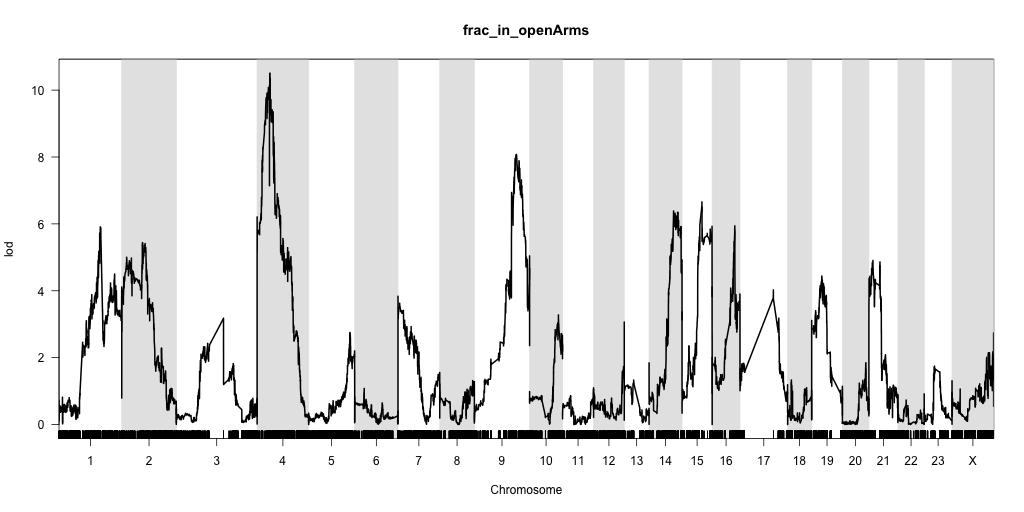

In [219]:
%%R -w 1024 -h 512
fraction_open_np <- scanone(cross,pheno="frac_in_openArms",model='np')
plot(fraction_open_np, bandcol = "gray90", main="frac_in_openArms")

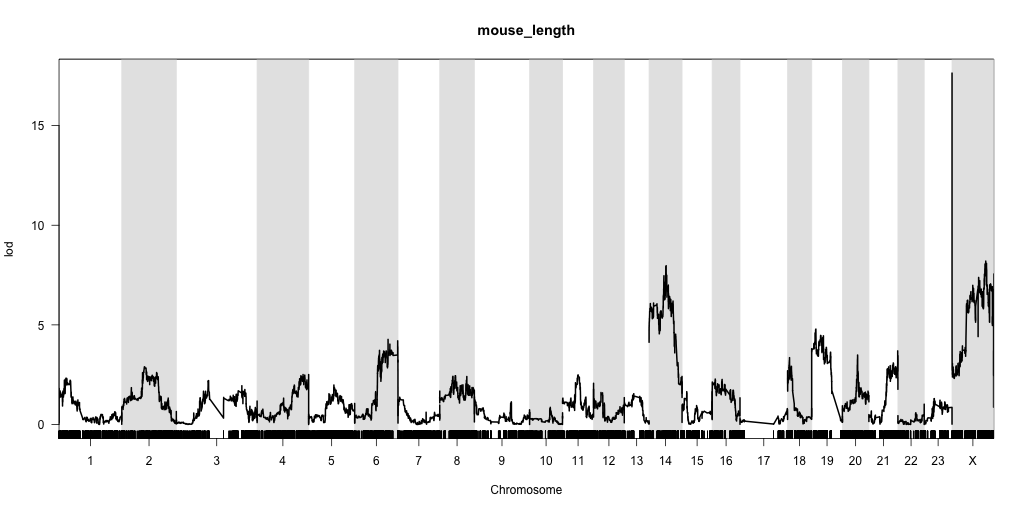

In [220]:
# %%R -w 1024 -h 512
# fraction_open_np <- scanone(cross,pheno="mouse_length",model='np')
# plot(fraction_open_np, bandcol = "gray90", main="mouse_length")

With sex as additive covariate

In [ ]:
# Add sex as an additive covariate and then add as an interactive covariate

# interacitve and additive, subtract the addtitive and plot that
# if flat, it means no parts of the geonome that have different effect in two sexes


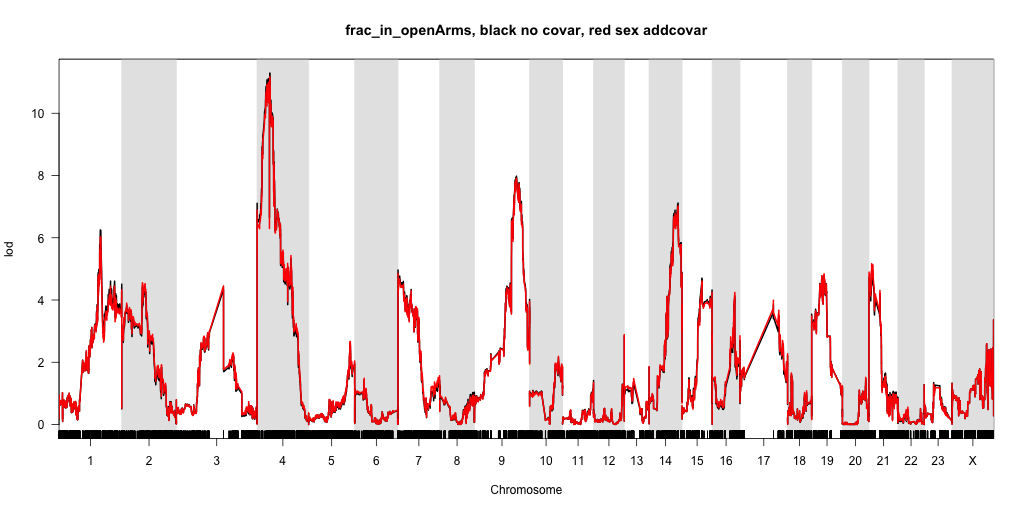

In [23]:
# %%R -w 1024 -h 512
# sex <- as.numeric(pull.pheno(cross, "sex") == "M")
# fraction_open_hk <- scanone(cross,pheno="frac_in_openArms",model='normal',method='hk')
# fraction_open_hk_sexcovar <- scanone(cross,pheno="frac_in_openArms",addcovar=sex,model='normal',method='hk')
# plot(fraction_open_hk,fraction_open_hk_sexcovar, bandcol = "gray90", col=c('black','red'), main="frac_in_openArms, black no covar, red sex addcovar")

Scans seem identical

In [24]:
# %%R
# bayesint(fraction_open_np, chr="4",prob=0.95)

           chr      pos       lod
4:25708247   4 25708247  9.245762
4:39404367   4 39404367 10.509109
4:49195796   4 49195796  9.149855


In [25]:
# %%R
# bayesint(fraction_open_np, chr="9",prob=0.95)

            chr       pos      lod
9:114036283   9 114036283 6.939135
9:128952147   9 128952147 8.078466
9:145475428   9 145475428 6.952988


In [26]:
# %%R
# bayesint(fraction_open_np, chr="14",prob=0.95)

            chr      pos      lod
14:70611946  14 70611946 5.479407
14:75192550  14 75192550 6.385533
14:98199397  14 98199397 5.499301


####Distance travelled in open arms

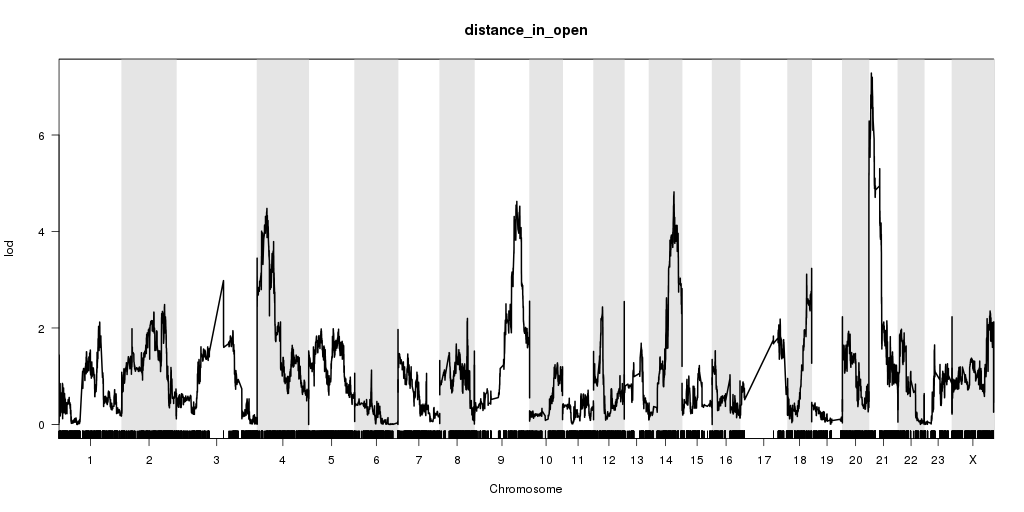

In [46]:
# %%R -w 1024 -h 512
# distance_open_np <- scanone(cross,pheno="entries_o_c_ratio",model='np')
# plot(distance_open_np, bandcol = "gray90", main="distance_in_open")

####Ratio of entries to open and closed arms 

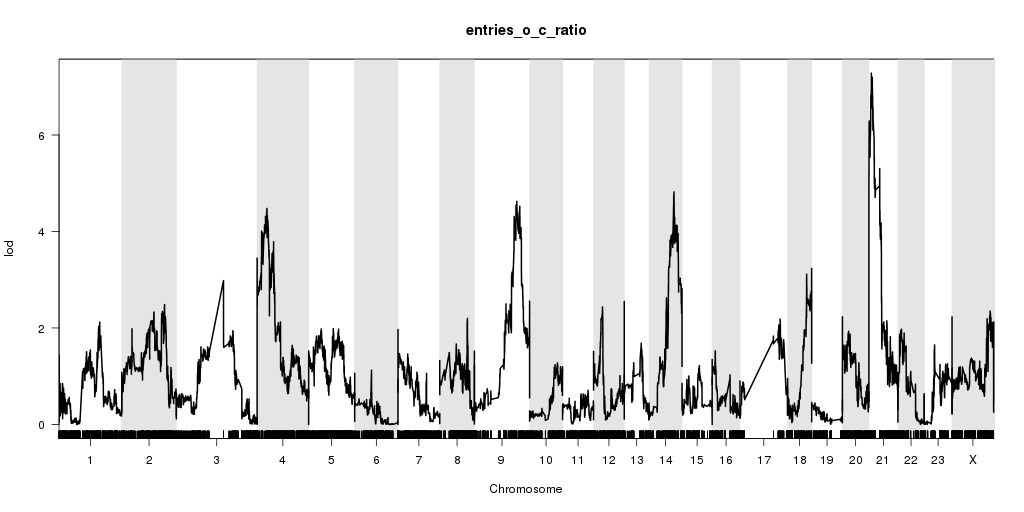

In [47]:
# %%R -w 1024 -h 512
# entries_ratio_np <- scanone(cross,pheno="entries_o_c_ratio",model='np')
# plot(entries_ratio_np, bandcol = "gray90", main="entries_o_c_ratio")

####Fraction of entries to open arms

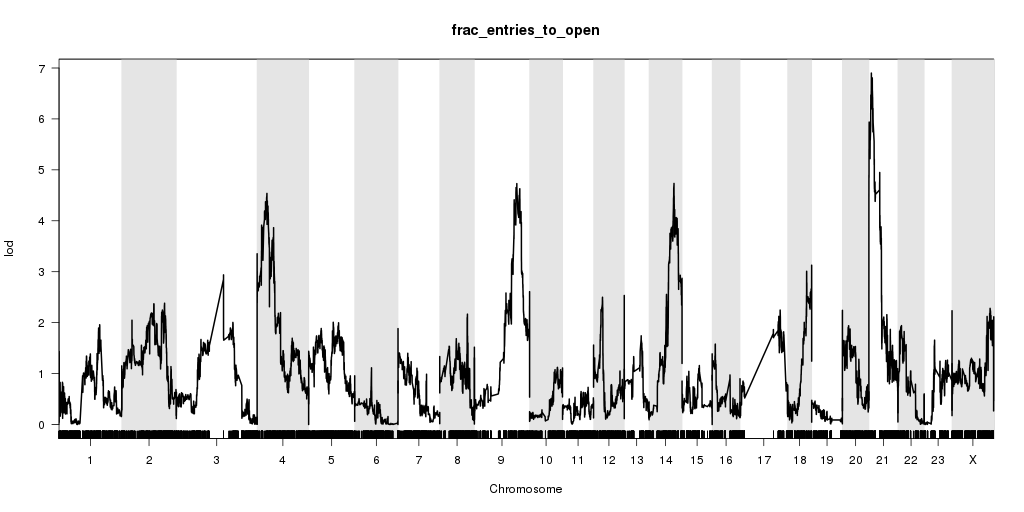

In [48]:
# %%R -w 1024 -h 512
# entries_fraction_np <- scanone(cross,pheno="frac_entries_to_open",model='np')
# plot(entries_fraction_np, bandcol = "gray90", main="frac_entries_to_open")

####Ratio of distance travelled in open and closed arms

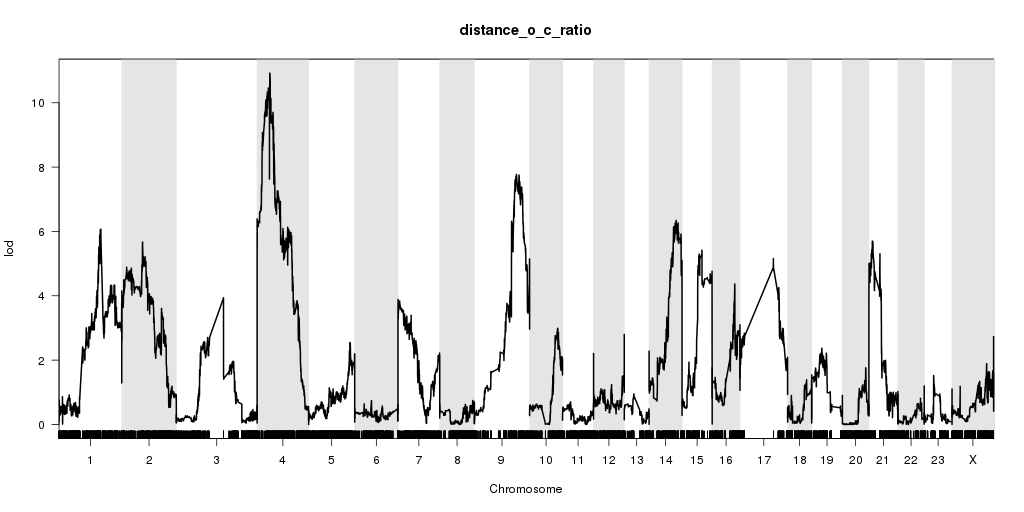

In [49]:
# %%R -w 1024 -h 512
# distance_ratio_np <- scanone(cross,pheno="distance_o_c_ratio",model='np')
# plot(distance_ratio_np, bandcol = "gray90", main="distance_o_c_ratio")

####Speed in open arms

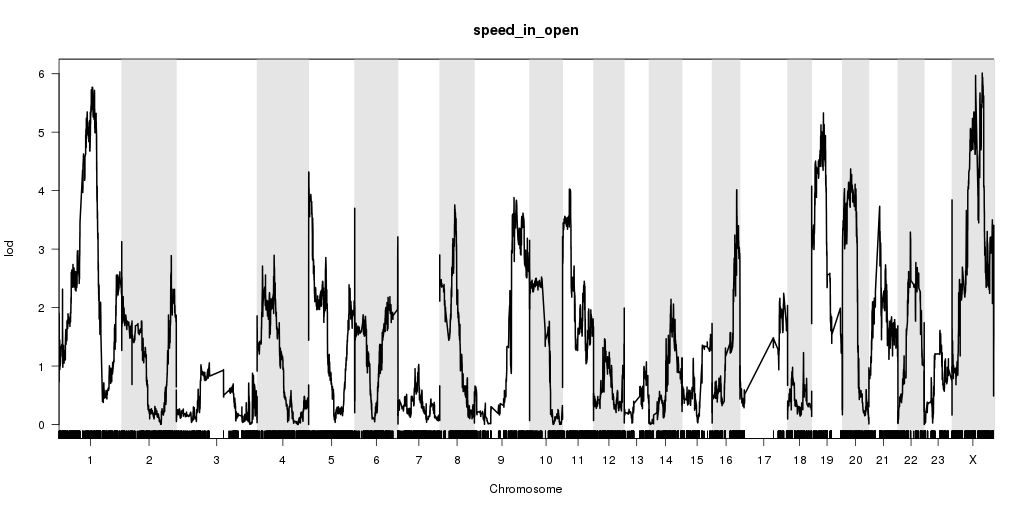

In [50]:
# %%R -w 1024 -h 512
# speed_in_open_np <- scanone(cross,pheno="speed_in_open",model='np')
# plot(speed_in_open_np, bandcol = "gray90", main="speed_in_open")

####Speed in closed arms

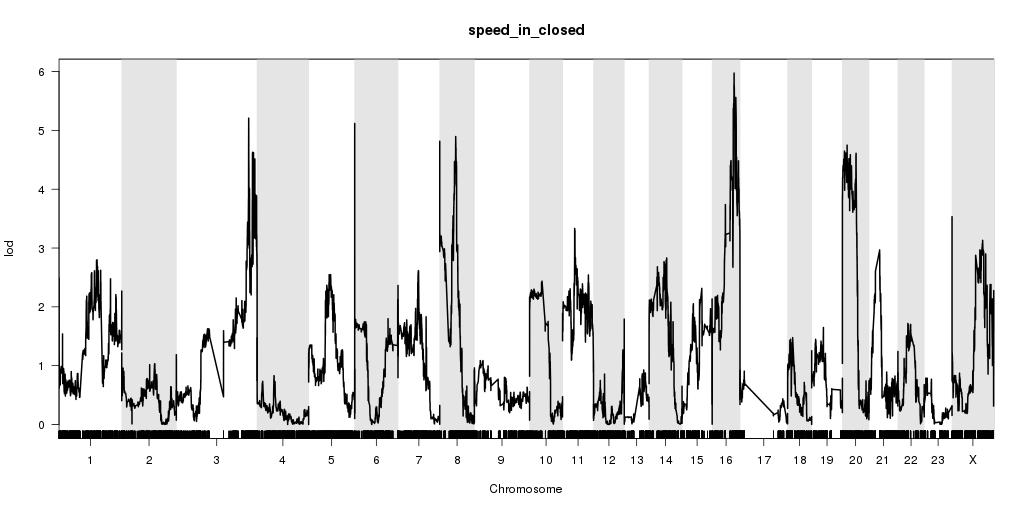

In [51]:
# %%R -w 1024 -h 512
# speed_in_closed_np <- scanone(cross,pheno="speed_in_closed",model='np')
# plot(speed_in_closed_np, bandcol = "gray90", main="speed_in_closed")

##Non-parametric scans for selected phenotypes

Also do 1000 permutations. Plot results and save pdfs.

In [7]:
print robjects.r('names(cross$pheno)')

 [1] "id"                      "sex"                    
 [3] "frac_in_closedAndMiddle" "frac_in_closedArms"     
 [5] "frac_in_middle"          "frac_in_openArms"       
 [7] "entries_to_closed"       "entries_to_open"        
 [9] "distance_in_closed"      "distance_in_open"       
[11] "speed_in_closed"         "speed_in_open"          
[13] "entries_o_c_ratio"       "distance_o_c_ratio"     
[15] "speed_o_c_ratio"         "total_frames"           
[17] "tested_more_than_once"   "pgm"                    
[19] "frac_entries_to_open"    "frac_distance_in_open"  



Phenotypes to run QTL scans

In [25]:
# phenotypes_of_interest = [
#     "frac_in_openArms",
#     "entries_to_open",
#     "distance_in_open",
#     "frac_in_closedArms",
#     "frac_in_middle",
#     "entries_to_closed",
#     "entries_o_c_ratio",
#     "frac_entries_to_open",
#     "distance_in_closed",
#     "distance_o_c_ratio",
#     "frac_distance_in_open",
#     "speed_in_open",
#     "speed_in_closed",
#     "speed_o_c_ratio"
#     ]
phenotypes_of_interest = [
    'fraction_in_arms_closed',
    'fraction_in_arms_middle',
    'mouse_length',
    'peeking_average_length_total',
    'rest_fraction_all_arms',
    'rest_fraction_closed_arms',
    'rest_fraction_open_arms',
    'turning_preferences_fraction_back',
    'turning_preferences_fraction_left',
    'turning_preferences_fraction_right',
    'turning_preferences_fraction_straight',
    'velocity_closed_towards_outside_average_speed_active',
    'velocity_open_towards_middle_average_speed_active',
    'velocity_open_towards_outside_average_speed_active'
]

Define scan functions

In [26]:
def scanone_perm(pheno):
    scanone_cmd = '''
        tryCatch({
            model <- "np"
            method <- NULL
            scanName <- model
            # scanone
            out <- scanone(cross, pheno="%s", model=model, method=method)
            # scanone permutations
            operm <- scanone(cross, pheno="%s", model=model, method=method, perm.Xsp=TRUE, n.perm=numPerm, n.cluster=numClusters)
            # Add results to list
            maleAndFemale_scanone[["%s"]][[scanName]]$out <- out
            maleAndFemale_scanone[["%s"]][[scanName]]$perm <- operm
            }, error = function(err) {
                rm(out,operm)
                print(paste("%s", err))
        })
        ''' % tuple([pheno for i in range(5)])
    return scanone_cmd

def do_scanone(scanone_cmd):
    robjects.r(scanone_cmd)

Define number of permutations and clusters

In [27]:
%%R
numPerm <- 1000
numClusters <- 24

To run permutations in 24 cores ("clusters") in parallel, need to invoke interactive session in SLURM like this:  

`srun --pty -p holyhoekstra,interact --mem-per-cpu 8000 -n 24 -t 1620 --tunnel 8880:8880 bash`  

<= 2000 MB mem per cpu is not enough. Haven't tried values between 2000 and 8000.  
With this large (>1500) number of animals, each scan with 500 permutations takes > 8 hours.

Create empty list to contain results

In [39]:
%%R
print(names(cross$pheno))

 [1] "id"                                                  
 [2] "sex"                                                 
 [3] "frac_in_closedAndMiddle"                             
 [4] "frac_in_closedArms"                                  
 [5] "frac_in_middle"                                      
 [6] "frac_in_openArms"                                    
 [7] "entries_to_closed"                                   
 [8] "entries_to_open"                                     
 [9] "distance_in_closed"                                  
[10] "distance_in_open"                                    
[11] "speed_in_closed"                                     
[12] "speed_in_open"                                       
[13] "entries_o_c_ratio"                                   
[14] "distance_o_c_ratio"                                  
[15] "speed_o_c_ratio"                                     
[16] "total_frames"                                        
[17] "tested_more_than_once"            

In [28]:
%%R
maleAndFemale_scanone <- list()

In [30]:
for p in phenotypes_of_interest:
    #skip phenotype if it has already been analyzed
    if robjects.r('"perm" %%in%% names(maleAndFemale_scanone$%s$np)' % p)[0]:
        print (p, 'done')
        continue
    print('Working on', p)
    scanone_cmd = scanone_perm(p)
    do_scanone(scanone_cmd)
    robjects.r('save.image("%s")' % cross_path)
    print('Done with', p)

Working on fraction_in_arms_closed
[1]
 "fraction_in_arms_closed Error in scanone(cross, pheno = \"fraction_in_arms_closed\", model = model, : Couldn't identify phenotype \"fraction_in_arms_closed\"\n"


Done with fraction_in_arms_closed
Working on fraction_in_arms_middle
[1]
 "fraction_in_arms_middle Error in scanone(cross, pheno = \"fraction_in_arms_middle\", model = model, : Couldn't identify phenotype \"fraction_in_arms_middle\"\n"


Done with fraction_in_arms_middle
Working on mouse_length
[1]
 "mouse_length Error in scanone(cross, pheno = \"mouse_length\", model = model, method = method): Couldn't identify phenotype \"mouse_length\"\n"


Done with mouse_length
Working on peeking_average_length_total
[1]
 "peeking_average_length_total Error in scanone(cross, pheno = \"peeking_average_length_total\", model = model, : Couldn't identify phenotype \"peeking_average_length_total\"\n"


Done with peeking_average_length_total
Working on rest_fraction_all_arms
[1]
 "rest_fraction_all_arms

Save cross

In [ ]:
%%R -i cross_path
save.image(cross_path)

####Plot results

In [12]:
%%R
PDFPath = "/n/hoekstrafs3/bendesky/genotyping/msg/20151111/rqtl/EPM/np_scans_sexesCombined_20170123.pdf"  
pdf(file=PDFPath, height=9, width=7.5, paper="letter")
par(mfrow=c(2,1), cex=0.8)
scanName <- "np"
for (p in names(maleAndFemale_scanone)) {
    if (scanName %in% names(maleAndFemale_scanone[[p]])) {
        main <- bquote(.(p) ~ "non-parametric, both sexes")  
        plot(maleAndFemale_scanone[[p]][[scanName]]$out,
            main=main,
            col=c("black"),
            incl.markers=FALSE,
            bandcol='gray84',
            gap=50000000,
            lty=1)
        
        # Plot thresholds from permutations
        usr <- par("usr")
        clip(usr[1],xaxisloc.scanone(maleAndFemale_scanone[[p]][[scanName]]$out, 'X', 0, gap=50000000)-50000000/1.7,0,100)
        # Autosomes
        thresh <- summary(maleAndFemale_scanone[[p]][[scanName]]$perm, alpha=0.05)$A
        abline(h=thresh, lty=2, col="dimgray")        
        # X chromosome
        clip(xaxisloc.scanone(out, 'X', 0, gap=50000000)-50000000/2,usr[2],0,100)
        thresh <- summary(maleAndFemale_scanone[[p]][[scanName]]$perm, alpha=0.05)$X
        abline(h=thresh, lty=2, col="dimgray")                
        }
    }
dev.off()

png 
  2 


###Get coordinates of QTL peaks

QTL significance threshold

In [13]:
alpha = 0.05

Get the significant QTLs for all traits at a particular alpha based on permutations

In [76]:
qtls = {pheno:[] for pheno in phenotypes_of_interest}

for pheno in phenotypes_of_interest:
    r_cmd = '''
        summary(maleAndFemale_scanone$%s$np$out,
        perms=maleAndFemale_scanone$%s$np$perm,
        alpha=%s)
        ''' % (pheno, pheno, alpha)
    qtl = robjects.r(r_cmd)
    qtls[pheno] = [(row['chr'],int(row['pos'])) for index,row in qtl.iterrows()]

In [69]:
qtls

{'distance_in_closed': [('5', 53472145),
  ('6', 131831476),
  ('11', 115982),
  ('14', 52343297),
  ('16', 65828876),
  ('17', 8824774),
  ('19', 36061086)],
 'distance_in_open': [('1', 127717351),
  ('4', 39404367),
  ('9', 127281692),
  ('14', 90513504),
  ('15', 60991978),
  ('16', 69379925),
  ('19', 31024377),
  ('21', 45818910)],
 'distance_o_c_ratio': [('1', 127954521),
  ('2', 63958464),
  ('4', 38935164),
  ('9', 128952147),
  ('14', 82877359),
  ('15', 60991978),
  ('16', 69282945),
  ('17', 102411467),
  ('21', 23053337)],
 'entries_o_c_ratio': [('4', 30081012),
  ('9', 130093178),
  ('14', 76393343),
  ('21', 20085597)],
 'entries_to_closed': [('1', 115114242), ('6', 56668), ('16', 67827077)],
 'entries_to_open': [('1', 124640333),
  ('8', 6478),
  ('9', 127366858),
  ('16', 67440330),
  ('21', 28460766)],
 'frac_distance_in_open': [('1', 127954521),
  ('2', 63958464),
  ('4', 38935164),
  ('9', 128952147),
  ('14', 82877359),
  ('15', 60991978),
  ('16', 69282945),
  ('17

####Get bayes intervals for QTL peaks

In [16]:
bayes_prob = 0.95

Update `qtls` dictionary with qtl coordinates

In [77]:
# qtl coordinates (chromosome, start, peak, end)
# qtl = ('3',30308454,64243045,80696262)
for pheno,qtl in qtls.items():
    new_qtl_info = []
    for chrom,pos in qtl:
        r_cmd = 'bayesint(maleAndFemale_scanone$%s$np$out, chr="%s", prob=%s)' % (pheno, chrom, bayes_prob)
        bayes_int = robjects.r(r_cmd)
        qtl_left_end = int(bayes_int.iloc[0,1])
        qtl_peak = int(bayes_int.iloc[1,1])
        qtl_right_end = int(bayes_int.iloc[2,1])
        new_qtl_info.append((chrom, qtl_left_end, qtl_peak, qtl_right_end))
    qtls[pheno] = new_qtl_info

In [71]:
qtls

{'distance_in_closed': [('5', 241664, 53472145, 80767724),
  ('6', 90101165, 131831476, 132643062),
  ('11', 17097, 115982, 65773967),
  ('14', 25441242, 52343297, 77069042),
  ('16', 16498524, 65828876, 85065303),
  ('17', 4081906, 8824774, 14356415),
  ('19', 11037261, 36061086, 42833950)],
 'distance_in_open': [('1', 122010390, 127717351, 128552728),
  ('4', 24807183, 39404367, 53335950),
  ('9', 121279789, 127281692, 148810630),
  ('14', 70770352, 90513504, 100992641),
  ('15', 53347340, 60991978, 91991960),
  ('16', 63263951, 69379925, 85111835),
  ('19', 10388212, 31024377, 46375682),
  ('21', 20783334, 45818910, 46694051)],
 'distance_o_c_ratio': [('1', 115940104, 127954521, 170735998),
  ('2', 255445, 63958464, 89001573),
  ('4', 22608800, 38935164, 49199173),
  ('9', 121777969, 128952147, 148132281),
  ('14', 73554881, 82877359, 98213823),
  ('15', 48215083, 60991978, 91986688),
  ('16', 54799738, 69282945, 85242922),
  ('17', 102192289, 102411467, 102995936),
  ('21', 1265231

Save file with QTL coordinates

In [80]:
# file path
qtls_filepath = os.path.join(rqtl_dir, 'qtlCoordinates_20170123.csv')

In [84]:
with open(qtls_filepath,'w') as fh:
    header = ['phenotype', 'chromosome', 'qtl_left_end', 'qtl_peak', 'qtl_right_end', '\n']
    line = ','.join(header)
    fh.write(line)
    for p,qtl in qtls.items():
        for q in qtl:
            line = p + ',' + ','.join(str(x) for x in q) + '\n'
            fh.write(line)

###Plot QTL scans as heat maps

In [85]:
phenotypes_to_plot = phenotypes_of_interest

Get maximum lod score in experiment to use as **vmax** in **imshow** and so all phenotypes are plotted on the same scale

In [88]:
lods = []
for pheno in phenotypes_of_interest:
    # Males
    r_cmd = '''
        summary(maleAndFemale_scanone$%s$np$out,
        perms=maleAndFemale_scanone$%s$np$perm,
        alpha=%s)
        ''' % (pheno, pheno, alpha)
    qtl = robjects.r(r_cmd)
    lods.extend(qtl.iloc[:,2].tolist())

max_lod = sorted(lods)[-1]

print max_lod

10.9236551831


In [93]:
%%R
summary(cross)

    F2 intercross

    No. individuals:    1571 

    No. phenotypes:     20 
    Percent phenotyped: 100 100 100 100 100 100 100 100 100 100 92.2 93.8 99.6 
                        100 89.9 100 100 100 99.6 100 

    No. chromosomes:    24 
        Autosomes:      1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 
                        23 
        X chr:          X 

    Total markers:      51739 
    No. markers:        3680 2706 3346 3181 3273 2538 2402 2543 2012 1806 2183 
                        1950 1134 1704 1529 1786 938 1543 1309 1853 2228 1588 
                        1647 2860 
    Percent genotyped:  99.1 
    Genotypes (%):    
          Autosomes:        AA:23.6      AB:51.6      BB:24.8  not BB:0.0  
                        not AA:0.0  
       X chromosome:        AA:21.3     ABf:19.7     ABr:6.2       BB:0.4  
                            AY:24.1      BY:28.3 


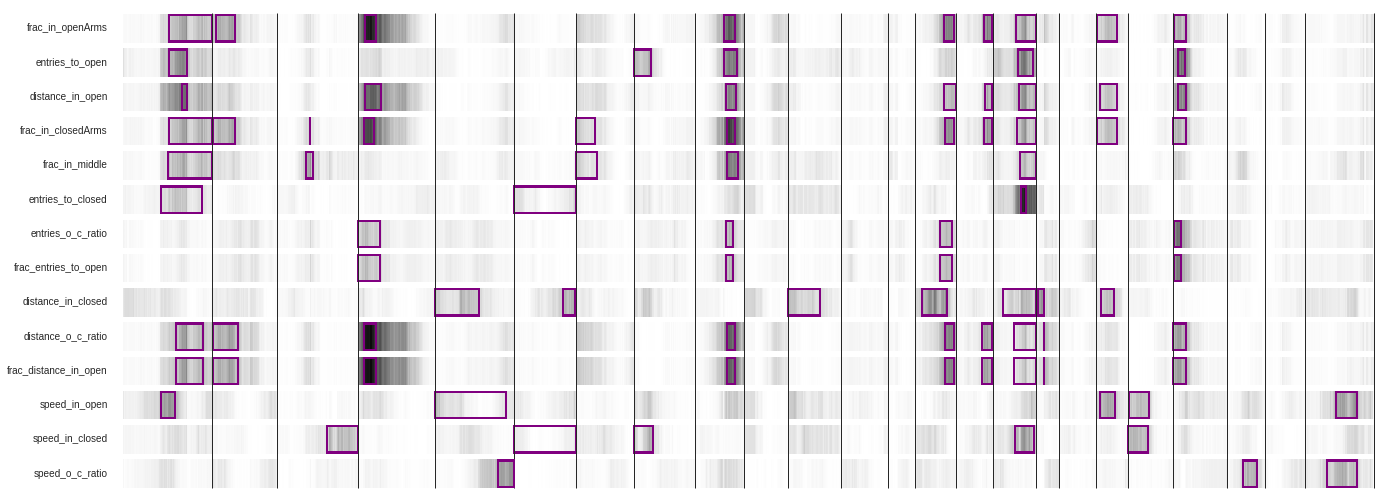

In [112]:
nrows = len(phenotypes_to_plot)

def plot_axis(ax, lods, pheno):
    gradient = np.vstack((lods, lods))
    ax.imshow(gradient, aspect='auto', cmap='Greys', vmin=0, vmax=np.ceil(max_lod))
    pos = list(ax.get_position().bounds)
    x_text = pos[0] - 0.01
    y_text = pos[1] + pos[3]/2.
    fig.text(x_text, y_text, pheno, va='center', ha='right', fontsize=10)

def plot_QTL_interval(ax, bayesint):
    '''
    Draws a box at the QTL bayes support interval 
    '''
    ax.autoscale(False)
    ax.axvline(x=bayesint[0], linewidth=2, color='purple')
    ax.axvline(x=bayesint[1], linewidth=2, color='purple')
    ymin, ymax = pyplot.ylim()
    ax.hlines([-0.48,1.48], bayesint[0], bayesint[1], colors='purple', linewidth=4)
    
def marker_in_genome_from_pos_in_chrom(chrom,pos_in_chrom):
    first_marker = list(robjects.r('markernames(cross, "%s")' % chrom))[0]
    # Because I changed the chromosome names, markers in some chromosomes now don't match the name of the chromosome,
    # so we need this hack
    marker_chrom_name = first_marker.split(':')[0]
    marker_pos_in_chrom = list(robjects.r('markernames(cross, "%s")' % chrom)).index(marker_chrom_name+':'+str(pos_in_chrom))
    if chrom == '1':
        marker_pos_in_genome = marker_pos_in_chrom 
    else:
        marker_pos_in_genome = marker_pos_in_chrom + chrom_starts[chrom_names[chrom_names.index(chrom)-1]]
    return marker_pos_in_genome

# Demarcate edges of chromosomes
chr_edges = []
markers_per_chrom = list(robjects.r('nmar(cross)'))
edge = 0
for chrom in markers_per_chrom:
    edge += chrom
    chr_edges.append(edge)
# np.array(chr_edges)
chrom_names = list(robjects.r('chrnames(cross)'))
chrom_starts = dict(zip(chrom_names,chr_edges))
    
fig, axes = pyplot.subplots(nrows=nrows)
fig.subplots_adjust(top=0.95, bottom=0.01, left=0.2, right=0.99)

for i,pheno in enumerate(phenotypes_to_plot):
    # Get scanone data
    r_cmd = 'maleAndFemale_scanone$%s$np$out' % pheno
    lods = np.array(robjects.r(r_cmd).iloc[:,2])
    plot_axis(axes[i], lods, pheno)

    # Get bayes support interval
    for qtl in qtls[pheno]:
        chrom = qtl[0]
        qtl_left_end, qtl_right_end = qtl[1], qtl[3]
        left_pos_in_plot = marker_in_genome_from_pos_in_chrom(chrom,qtl_left_end)
        right_pos_in_plot = marker_in_genome_from_pos_in_chrom(chrom,qtl_right_end)
        plot_QTL_interval(axes[i], (left_pos_in_plot,right_pos_in_plot))

for ax in axes:
    ax.set_axis_off()

ax.set_axis_on()

# Remove horizontal white lines
ax.tick_params(
    axis='y',
    which='both',
    left='off',
    right='off',
    labelleft='off')
ax.yaxis.grid(False)

# Plot chromosome borders
ax.set_xticks(chr_edges)
ax.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    direction='in',
    length=475,
    labelbottom='off',
    top='off',)         # ticks along the top edge are off

# Save figure
pyplot.savefig(os.path.join(rqtl_dir,'qtls_sexesCombined_heatMap_20170123.pdf'))

####Select traits to continue analyzing

Some traits, such as  
+ *entries_o_c_ratio* and *frac_entries_to_open*  
+ *distance_o_c_ratio* and *frac_distance_in_open*  

are basically the same trait, just calculated slightly different, so remove one from each pair, based on the one with the least missing data

Count missing data and infinite values in each of these four traits

In [70]:
for p in ['entries_o_c_ratio', 'frac_entries_to_open', 'distance_o_c_ratio', 'frac_distance_in_open']:
    print p, robjects.r('sum(is.infinite(cross$pheno$%s), na.rm=TRUE)' % p)[0], 'Inf'
    print p, robjects.r('sum(is.na(cross$pheno$%s), na.rm=TRUE)' % p)[0], 'NA'

entries_o_c_ratio 2 Inf
entries_o_c_ratio 6 NA
frac_entries_to_open 0 Inf
frac_entries_to_open 6 NA
distance_o_c_ratio 0 Inf
distance_o_c_ratio 0 NA
frac_distance_in_open 0 Inf
frac_distance_in_open 0 NA


*frac_entries_to_open* has 2 fewer unusable (Inf) values than *entries_o_c_ratio* so keep *frac_entries*.  
For *distance* there are no missing values so keep the fraction as well.  
Also remove *frac_in_middle*, which is probably not providing any additional useful information.  
Also remove *frac_in_openArms* which is basically the same as frac_in_closedArms

In [12]:
phenotypes_of_interest = [
    "frac_in_openArms",
    "frac_in_closedArms",
    "entries_to_open",
    "entries_to_closed",
    "frac_entries_to_open",
    "distance_in_open",
    "distance_in_closed",
    "frac_distance_in_open",
    "speed_in_open",
    "speed_in_closed",
    "speed_o_c_ratio"
    ]

###Effect plots

####First add sim.geno output to cross, because effectplot requires it

In [7]:
%%R
cross <- sim.geno(cross, n.draws=4, step=0, off.end=0, error.prob=0.001, map.function="c-f", stepwidth="fixed")

In [9]:
%%R -i cross_path
save.image(cross_path)

In [25]:
%%R
PDFPath = "/n/hoekstrafs3/bendesky/genotyping/msg/20151111/rqtl/EPM/effectPlots_sexes-combined.pdf"  
pdf(file=PDFPath, height=9, width=7.5, paper="letter")
par(mfrow=c(4,5), cex=0.6)
for (p in names(maleAndFemale_scanone)) {
    # Skip phenotypes with infinite values for now
    if (any(is.infinite(cross$pheno[[p]]))) {
        next
    }
    for (scanName in names(maleAndFemale_scanone[[p]])) {
        markers <- c()
        out <- maleAndFemale_scanone[[p]][[scanName]]$out
        operm <- maleAndFemale_scanone[[p]][[scanName]]$perm
        markers <- append(markers, rownames(summary(out,perms=operm,alpha=0.05)))
        for (m in markers) {
            effectplot(cross, pheno=p, mname1=m, main="", add.legend=FALSE)
        }
    }
}
dev.off()

png 
  2 


#Interactions among significant QTL

As a first pass, check for interactions in two marker effect plots, using markers at peak of significant QTL.

####Plotting function

In [12]:
def effectPlot_2markers(cross,pheno,marker1,marker2):
    '''
    Takes a cross object, a phenotype and two markers and produces an effect plot using R/qtl effectplot in pdf to the output_dir
    '''
    plot_path = os.path.join(output_dir,'-'.join([pheno,marker1.replace(':','_'),marker2.replace(':','_')]))+'.pdf'
    r_cmd = 'effectplot(%s, pheno="%s", mname1="%s", mname2="%s", main="")' % (cross, pheno, marker1, marker2)
    plot = robjects.r(r_cmd)

Import `combinations` to plot all combinations of QTLs for a given behavior

In [13]:
from itertools import combinations

In [29]:
output_dir = os.path.join(rqtl_dir,'effectPlot2_2markers')
cross_object = 'cross'

for pheno,qtl_peaks in qtls.items():
    # Exclude phenotypes that have infinite values, because effectplot errors out on them
    r_cmd = 'any(is.infinite(%s$pheno$%s))' % (cross_object, pheno)
    if robjects.r(r_cmd)[0]:
        continue
        
    plot_path = os.path.join(output_dir,pheno+'.pdf')
    #Plot settings
    r_cmd = '''
        PDFPath = "%s"
        pdf(file=PDFPath, height=9, width=7.5, paper="letter")
        par(mfrow=c(3,2), cex=0.6)
        ''' % plot_path
    plot_settings = robjects.r(r_cmd)
    for (marker1,marker2) in combinations(qtl_peaks,2):
        effectPlot_2markers(cross_object,pheno,marker1,marker2)
    robjects.r('dev.off()')

###Make formal QTL model

One phenotype as example

In [20]:
pheno = 'frac_in_closedArms'

Make qtl objects

In [34]:
%%R -i pheno
qtl_model <- makeqtl(cross, c(1,2,3,4,7,"8a",9,14,15,"16-21",19),
                    c(124640333,63958464,144648666,39404367,40701,69152933,127281692,79558134,60937037,23053337,31024377), what="prob")

Refine qtl locations

In [37]:
%%R
rqtl_model <- refineqtl(cross, pheno="frac_in_closedArms", qtl=qtl_model, method="hk", verbose=FALSE)

In [38]:
%%R
options(width=64)
rqtl_model

  QTL object containing genotype probabilities. 

                name   chr       pos n.gen
Q1     1@192227689.0     1 192227689     3
Q2      2@69513666.0     2  69513666     3
Q3     3@144648666.0     3 144648666     3
Q4      4@38718758.0     4  38718758     3
Q5        7@200278.0     7    200278     3
Q6     8a@69368821.0    8a  69368821     3
Q7     9@127771355.0     9 127771355     3
Q8     14@82830140.0    14  82830140     3
Q9     15@61246181.0    15  61246181     3
Q10 16-21@21069653.0 16-21  21069653     3
Q11    19@36004287.0    19  36004287     3


In [43]:
%%R
options(width=128)
summary(fitqtl(cross, pheno="frac_in_closedArms", qtl=rqtl_model, method="hk"), pvlaues=FALSE)


		fitqtl summary

Method: Haley-Knott regression 
Model:  normal phenotype
Number of observations : 1571 

Full model result
----------------------------------  
Model formula: y ~ Q1 + Q2 + Q3 + Q4 + Q5 + Q6 + Q7 + Q8 + Q9 + Q10 + Q11 

        df        SS         MS      LOD    %var Pvalue(Chi2) Pvalue(F)
Model   22  3.940366 0.17910753 69.35692 18.3975            0         0
Error 1548 17.477578 0.01129043                                        
Total 1570 21.417944                                                   


Drop one QTL at a time ANOVA table: 
----------------------------------  
                 df Type III SS    LOD  %var F value Pvalue(Chi2) Pvalue(F)    
1@192227689.0     2      0.3266  6.315 1.525  14.462            0  5.99e-07 ***
2@69513666.0      2      0.2253  4.369 1.052   9.976            0  4.96e-05 ***
3@144648666.0     2      0.2444  4.738 1.141  10.825            0  2.15e-05 ***
4@38718758.0      2      0.5830 11.195 2.722  25.820            0  9.32e-12 *

####Check for interactions among significant qtl

In [45]:
%%R
addint(cross, pheno="frac_in_closedArms", qtl=rqtl_model, qtl.only=TRUE, method="hk")

Method: Haley-Knott regression 
Model:  normal phenotype
Model formula: y ~ Q1 + Q2 + Q3 + Q4 + Q5 + Q6 + Q7 + Q8 + Q9 + Q10 + Q11 

Add one pairwise interaction at a time table:
--------------------------------------------
                               df Type III SS     LOD    %var F value Pvalue(Chi2) Pvalue(F)  
1@192227689.0:2@69513666.0      4    0.026676 0.52108 0.12455 0.59006        0.663    0.6699  
1@192227689.0:3@144648666.0     4    0.110833 2.17020 0.51748 2.46342        0.041    0.0434 *
1@192227689.0:4@38718758.0      4    0.108278 2.12001 0.50555 2.40627        0.045    0.0477 *
1@192227689.0:7@200278.0        4    0.009463 0.18475 0.04418 0.20911        0.932    0.9335  
1@192227689.0:8a@69368821.0     4    0.021283 0.41567 0.09937 0.47061        0.752    0.7574  
1@192227689.0:9@127771355.0     4    0.049965 0.97664 0.23329 1.10666        0.343    0.3517  
1@192227689.0:14@82830140.0     4    0.021632 0.42248 0.10100 0.47834        0.746    0.7517  
1@192227689.0:15

#Non-parametric scans by sex

####Separate cross into males and females

In [8]:
%%R
y <- pull.pheno(cross, 2)
males <- subset(cross, ind = (y == 'M'))
females <- subset(cross, ind = (y == 'F'))

In [8]:
def scanone_perm(pheno):
    scanone_cmd = '''
        tryCatch({
            model <- "np"
            method <- NULL
            scanName <- model
            # scanone
            out.males <- scanone(males, pheno="%s", model=model, method=method)
            out.females <- scanone(females, pheno="%s", model=model, method=method)
            # scanone permutations
            seed <- ceiling(runif(1, 0, 10^8))
            set.seed(seed)
            operm.males <- scanone(males, pheno="%s", model=model, method=method, perm.Xsp=TRUE, n.perm=numPerm, n.cluster=numClusters)
            set.seed(seed)
            operm.females <- scanone(females, pheno="%s", model=model, method=method, perm.Xsp=TRUE, n.perm=numPerm, n.cluster=numClusters)
            # Add results to list
            bySex_scanone[["%s"]][[scanName]]$out$males <- out.males
            bySex_scanone[["%s"]][[scanName]]$out$females <- out.females
            bySex_scanone[["%s"]][[scanName]]$perm$males <- operm.males
            bySex_scanone[["%s"]][[scanName]]$perm$females <- operm.females
            }, error = function(err) {
                rm(out.males,out.females,operm.males,operm.females)
                print(paste("%s", err))
        })
        ''' % tuple([pheno for i in range(9)])
    return scanone_cmd

def do_scanone(scanone_cmd):
    robjects.r(scanone_cmd)

In [9]:
%%R
numPerm <- 1000
numClusters <- 24

Make sure to not run this cell if some phenotypes have already been analyzed, since this will delete the results

In [11]:
%%R
bySex_scanone <- list()

In [10]:
phenotypes_of_interest = [
    "frac_in_openArms",
    "frac_in_closedArms",
    "entries_to_open",
    "entries_to_closed",
    "frac_entries_to_open",
    "distance_in_open",
    "distance_in_closed",
    "frac_distance_in_open",
    "speed_in_open",
    "speed_in_closed",
    "speed_o_c_ratio"
    ]

In [ ]:
for p in phenotypes_of_interest:
    #skip phenotype if it has already been analyzed
    if robjects.r('"perm" %%in%% names(bySex_scanone$%s$np)' % p)[0]:
        print p, 'done'
        continue
    print 'Working on', p
    scanone_cmd = scanone_perm(p)
    do_scanone(scanone_cmd)
    robjects.r('save.image("%s")' % cross_path)
    print 'Done with', p

Working on frac_in_openArms
 -Running permutations via a cluster of

In [25]:
print robjects.r('''summary(bySex_scanone$speed_o_c_ratio$np$out$females,
        perms=bySex_scanone$speed_o_c_ratio$np$perm$females,
        alpha=0.05)''')

            chr        pos       lod
5:141217926   5  141217926  4.847220
22:54131122  22   54131122  6.063982


Add a couple more phenotypes

In [10]:
phenotypes_of_interest = [
    "distance_o_c_ratio",
    "frac_in_middle",
    "entries_o_c_ratio"]

In [11]:
for p in phenotypes_of_interest:
    #skip phenotype if it has already been analyzed
    if robjects.r('"perm" %%in%% names(bySex_scanone$%s$np)' % p)[0]:
        print p, 'done'
        continue
    print 'Working on', p
    scanone_cmd = scanone_perm(p)
    do_scanone(scanone_cmd)
    robjects.r('save.image("%s")' % cross_path)
    print 'Done with', p

Working on distance_o_c_ratio
 -Running permutations via a cluster of 24 nodes.
 -Running permutations via a cluster of 24 nodes.
Done with distance_o_c_ratio
Working on frac_in_middle
 -Running permutations via a cluster of 24 nodes.
 -Running permutations via a cluster of 24 nodes.
Done with frac_in_middle
Working on entries_o_c_ratio
 -Running permutations via a cluster of 24 nodes.
 -Running permutations via a cluster of 24 nodes.
Done with entries_o_c_ratio


In [12]:
%%R -i cross_path
save.image(cross_path)

####Plot results

In [13]:
%%R
PDFPath = "/n/holylfs/LABS/hoekstra_lab/hoekstrafs3/bendesky/genotyping/msg/20151111/rqtl/EPM/np_scans_bySex_20180327.pdf"  
pdf(file=PDFPath, height=9, width=7.5, paper="letter")
par(mfrow=c(2,1), cex=0.8)
scanName <- "np"
for (p in names(bySex_scanone)) {
    if (scanName %in% names(bySex_scanone[[p]])) {
        main <- bquote(.(p) ~ "non-parametric")  
        plot(bySex_scanone[[p]][[scanName]]$out$males,
             bySex_scanone[[p]][[scanName]]$out$females,
             main=main,
             col=c("#3953A3","#ED1C24"),
             incl.markers=FALSE,
             bandcol='gray84',
             gap=50000000,
             lty=1)  
        
        # Plot thresholds from permutations
        usr <- par("usr")
        clip(usr[1],xaxisloc.scanone(bySex_scanone[[p]][[scanName]]$out$males, 'X', 0, gap=50000000)-50000000/1.7,0,100)
        # Autosomes
        # Male threshold
        abline(h=summary(bySex_scanone[[p]][[scanName]]$perm$males, alpha=0.05)$A, lty=2, col="#3953A3")
        # Female threshold
        abline(h=summary(bySex_scanone[[p]][[scanName]]$perm$females, alpha=0.05)$A, lty=2, col="#ED1C24")

        # X chromosome
        clip(xaxisloc.scanone(out.males, 'X', 0, gap=50000000)-50000000/2,usr[2],0,100)
        # Male threshold
        abline(h=summary(bySex_scanone[[p]][[scanName]]$perm$males, alpha=0.05)$X, lty=2, col="#3953A3")
        # Female threshold
        abline(h=summary(bySex_scanone[[p]][[scanName]]$perm$females, alpha=0.05)$X, lty=2, col="#ED1C24")
        }
    }
dev.off()

png 
  2 


Copy files to another node I can mount in my computer

In [14]:
%cp /n/holylfs/LABS/hoekstra_lab/hoekstrafs3/bendesky/genotyping/msg/20151111/rqtl/EPM/np_scans_bySex_20180327.pdf /n/hoekstrafs4/bendesky/qtl/

In [28]:
%%R
summary(males)

    F2 intercross

    No. individuals:    808 

    No. phenotypes:     20 
    Percent phenotyped: 100 100 100 100 100 100 100 100 100 100 92.7 93.9 99.6 
                        100 90.8 100 100 100 99.6 100 

    No. chromosomes:    24 
        Autosomes:      1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 
                        23 
        X chr:          X 

    Total markers:      51739 
    No. markers:        3680 2706 3346 3181 3273 2538 2402 2543 2012 1806 2183 
                        1950 1134 1704 1529 1786 938 1543 1309 1853 2228 1588 
                        1647 2860 
    Percent genotyped:  99.2 
    Genotypes (%):    
          Autosomes:        AA:23.3      AB:51.4      BB:25.2  not BB:0.0  
                        not AA:0.0  
       X chromosome:        AY:46.0      BY:54.0 


In [29]:
%%R
summary(females)

    F2 intercross

    No. individuals:    763 

    No. phenotypes:     20 
    Percent phenotyped: 100 100 100 100 100 100 100 100 100 100 91.7 93.7 99.6 
                        100 89 100 100 100 99.6 100 

    No. chromosomes:    24 
        Autosomes:      1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 
                        23 
        X chr:          X 

    Total markers:      51739 
    No. markers:        3680 2706 3346 3181 3273 2538 2402 2543 2012 1806 2183 
                        1950 1134 1704 1529 1786 938 1543 1309 1853 2228 1588 
                        1647 2860 
    Percent genotyped:  99 
    Genotypes (%):    
          Autosomes:        AA:23.9      AB:51.7      BB:24.4  not BB:0.0  
                        not AA:0.0  
       X chromosome:        AA:44.8     ABf:41.4     ABr:13.0      BB:0.9  


###Get coordinates of QTL peaks

Make dictionary with all significant QTL for all traits

QTL significance threshold

In [15]:
alpha = 0.05

Get the significant QTLs for all traits at a particular alpha based on permutations

In [18]:
phenotypes_of_interest = [
    "frac_in_openArms",
    "frac_in_closedArms",
    "frac_in_middle",    
    "entries_to_open",
    "entries_to_closed",
    "entries_o_c_ratio",
    "frac_entries_to_open",
    "distance_in_open",
    "distance_in_closed",
    "distance_o_c_ratio",
    "frac_distance_in_open",
    "speed_in_open",
    "speed_in_closed",
    "speed_o_c_ratio"
    ]

In [19]:
qtls = {'males':None, 'females':None}
qtls['males'] = {pheno:[] for pheno in phenotypes_of_interest}
qtls['females'] = {pheno:[] for pheno in phenotypes_of_interest}
for pheno in phenotypes_of_interest:
    # Males
#     This command gets significant QTL for each feature
# Substitute the perms and alpha and use a threshold of 4. Summary just gives the highest peak from each chromosome 
# and use threshold of 4
# rqtl website search for summary of scanone object and find option for threshold
    r_cmd = '''
        summary(bySex_scanone$%s$np$out$males,
        perms=bySex_scanone$%s$np$perm$males,
        alpha=%s)
        ''' % (pheno, pheno, alpha)
    qtl = robjects.r(r_cmd)
    qtls['males'][pheno] = [(row['chr'],int(row['pos'])) for index,row in qtl.iterrows()]
    
    # Females
    r_cmd = '''
        summary(bySex_scanone$%s$np$out$females,
        perms=bySex_scanone$%s$np$perm$females,
        alpha=%s)
        ''' % (pheno, pheno, alpha)
    qtl = robjects.r(r_cmd)
    qtls['females'][pheno] = [(row['chr'],int(row['pos'])) for index,row in qtl.iterrows()]

#### Get bayes intervals for QTL peaks

In [20]:
bayes_prob = 0.95

Update qtls dictionary with qtl coordinates

In [21]:
# qtl coordinates (chromosome, start, peak, end)
# qtl = ('3',30308454,64243045,80696262)
for sex,pheno_qtls in qtls.items():
    for pheno,qtl in pheno_qtls.items():
        new_qtl_info = []
        for q in qtl:
            chrom = q[0]
            r_cmd = 'bayesint(bySex_scanone$%s$np$out$%s, chr="%s", prob=%s)' % (pheno, sex, chrom, bayes_prob)
            bayes_int = robjects.r(r_cmd)
            qtl_left_end = int(bayes_int.iloc[0,1])
            qtl_peak = int(bayes_int.iloc[1,1])
            qtl_right_end = int(bayes_int.iloc[2,1])
            new_qtl_info.append((chrom, qtl_left_end, qtl_peak, qtl_right_end))
        qtls[sex][pheno] = new_qtl_info

In [22]:
qtls

{'females': {'distance_in_closed': [('5', 55829484, 65758947, 104451981),
   ('14', 25411013, 29234920, 79021027)],
  'distance_in_open': [('9', 113899286, 144924515, 169185798)],
  'distance_o_c_ratio': [('9', 113899286, 144428602, 148569518)],
  'entries_o_c_ratio': [('21', 19747136, 45742785, 49805604)],
  'entries_to_closed': [],
  'entries_to_open': [('9', 115469437, 144101884, 169198213),
   ('21', 25222988, 32415870, 45833293)],
  'frac_distance_in_open': [('9', 113899286, 144428602, 148569518)],
  'frac_entries_to_open': [('21', 19747136, 45742785, 49805604)],
  'frac_in_closedArms': [('9', 113930934, 144882208, 169043731)],
  'frac_in_middle': [('9', 121827262, 169043731, 169199815)],
  'frac_in_openArms': [('9', 113899286, 144924515, 148144418)],
  'speed_in_closed': [('5', 55766972, 69206401, 81503373),
   ('14', 3038716, 29234920, 54723819)],
  'speed_in_open': [],
  'speed_o_c_ratio': [('5', 81328366, 141217926, 141369281),
   ('22', 36935895, 54131122, 59792005)]},
 'male

## Plots of lod profiles for all behaviors as heat maps

Get maximum lod score in experiment to use as `vmax` in `imshow` and so all phenotypes are plotted on the same scale

In [23]:
lods = []
for pheno in phenotypes_of_interest:
    # Males
    r_cmd = '''
        summary(bySex_scanone$%s$np$out$males,
        perms=bySex_scanone$%s$np$perm$males,
        alpha=%s)
        ''' % (pheno, pheno, alpha)
    qtl = robjects.r(r_cmd)
    lods.extend(qtl.iloc[:,2].tolist())

    # Females
    r_cmd = '''
        summary(bySex_scanone$%s$np$out$females,
        perms=bySex_scanone$%s$np$perm$females,
        alpha=%s)
        ''' % (pheno, pheno, alpha)
    qtl = robjects.r(r_cmd)
    lods.extend(qtl.iloc[:,2].tolist())

max_lod = sorted(lods)[-1]

print max_lod

9.08734764886


In [24]:
phenotypes_to_plot = [
    "frac_in_openArms",
    "frac_in_middle",    
    "entries_to_open",
    "entries_to_closed",
    "entries_o_c_ratio",
    "distance_in_open",
    "distance_in_closed",
    "distance_o_c_ratio",
    "speed_in_open",
    "speed_in_closed",
    "speed_o_c_ratio"
    ]

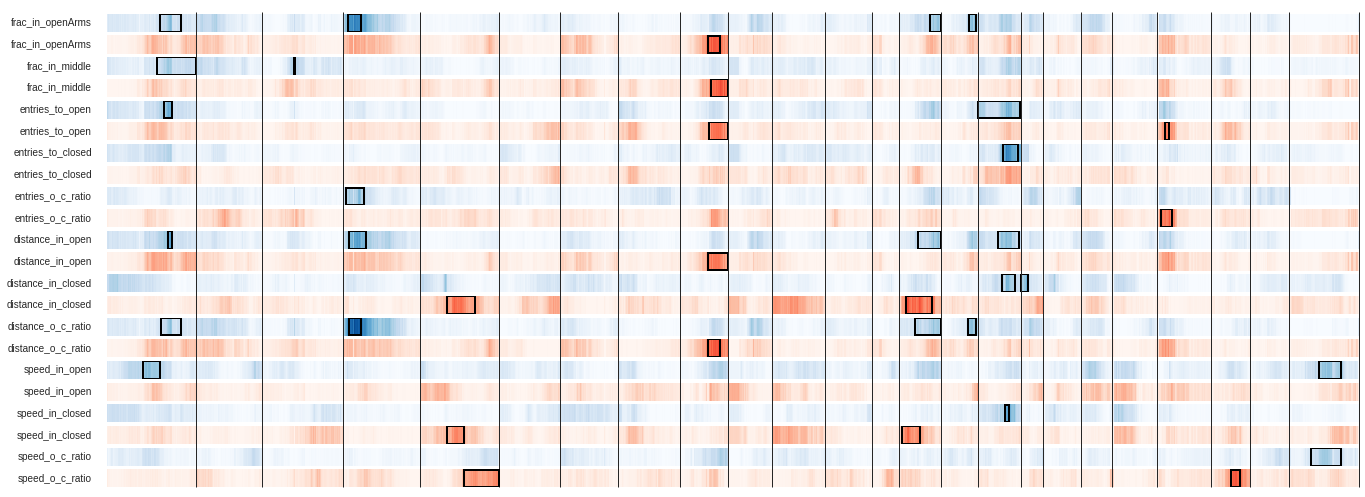

In [28]:
nrows = len(phenotypes_to_plot)*2 # *2 for the two sexes

def plot_axis(ax, lods, pheno, sex):
    gradient = np.vstack((lods, lods))
    sex_cmaps = {'female':'Reds', 'male':'Blues'}
    ax.imshow(gradient, aspect='auto', cmap=sex_cmaps[sex], vmin=0, vmax=np.ceil(max_lod))
    pos = list(ax.get_position().bounds)
    x_text = pos[0] - 0.01
    y_text = pos[1] + pos[3]/2.
    fig.text(x_text, y_text, pheno, va='center', ha='right', fontsize=10)

def plot_QTL_interval(ax, bayesint):
    '''
    Draws a box at the QTL bayes support interval 
    '''
    ax.autoscale(False)
    ax.axvline(x=bayesint[0], linewidth=2, color='black')
    ax.axvline(x=bayesint[1], linewidth=2, color='black')
    ymin, ymax = pyplot.ylim()
    ax.hlines([-0.48,1.48], bayesint[0], bayesint[1], colors='black', linewidth=2)

def marker_in_genome_from_pos_in_chrom(chrom,pos_in_chrom):
    first_marker = list(robjects.r('markernames(cross, "%s")' % chrom))[0]
    # Because I changed the chromosome names, markers in some chromosomes now don't match the name of the chromosome,
    # so we need this hack
    marker_chrom_name = first_marker.split(':')[0]
    marker_pos_in_chrom = list(robjects.r('markernames(cross, "%s")' % chrom)).index(marker_chrom_name+':'+str(pos_in_chrom))
    if chrom == '1':
        marker_pos_in_genome = marker_pos_in_chrom 
    else:
        marker_pos_in_genome = marker_pos_in_chrom + chrom_starts[chrom_names[chrom_names.index(chrom)-1]]
    return marker_pos_in_genome

# Demarcate edges of chromosomes
chr_edges = []
markers_per_chrom = list(robjects.r('nmar(cross)'))
edge = 0
for chrom in markers_per_chrom:
    edge += chrom
    chr_edges.append(edge)
# np.array(chr_edges)
chrom_names = list(robjects.r('chrnames(cross)'))
chrom_starts = dict(zip(chrom_names,chr_edges))
    
fig, axes = pyplot.subplots(nrows=nrows)
fig.subplots_adjust(top=0.95, bottom=0.01, left=0.2, right=0.99)

i = 0
for pheno in phenotypes_to_plot:
    for sex in ['male','female']:
        # Get scanone data
        r_cmd = 'bySex_scanone$%s$np$out$%s' % (pheno,sex)
        lods = np.array(robjects.r(r_cmd).iloc[:,2])
        plot_axis(axes[i], lods, pheno, sex)
        
        # Get bayes support interval
        for qtl in qtls[sex+'s'][pheno]:
            chrom = qtl[0]
            qtl_left_end, qtl_right_end = qtl[1], qtl[3]
            left_pos_in_plot = marker_in_genome_from_pos_in_chrom(chrom,qtl_left_end)
            right_pos_in_plot = marker_in_genome_from_pos_in_chrom(chrom,qtl_right_end)
            plot_QTL_interval(axes[i], (left_pos_in_plot,right_pos_in_plot))
        i += 1

for ax in axes:
    ax.set_axis_off()

ax.set_axis_on()

# Remove horizontal white lines
ax.tick_params(
    axis='y',
    which='both',
    left='off',
    right='off',
    labelleft='off')
ax.yaxis.grid(False)

# Plot chromosome borders
ax.set_xticks(chr_edges)
ax.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    direction='in',
    length=475,
    labelbottom='off',
    top='off',)         # ticks along the top edge are off

# Save figure
pyplot.savefig(os.path.join(rqtl_dir,'by_sex_qtls_3d_plot_20180327.pdf'))

Plot scale bar

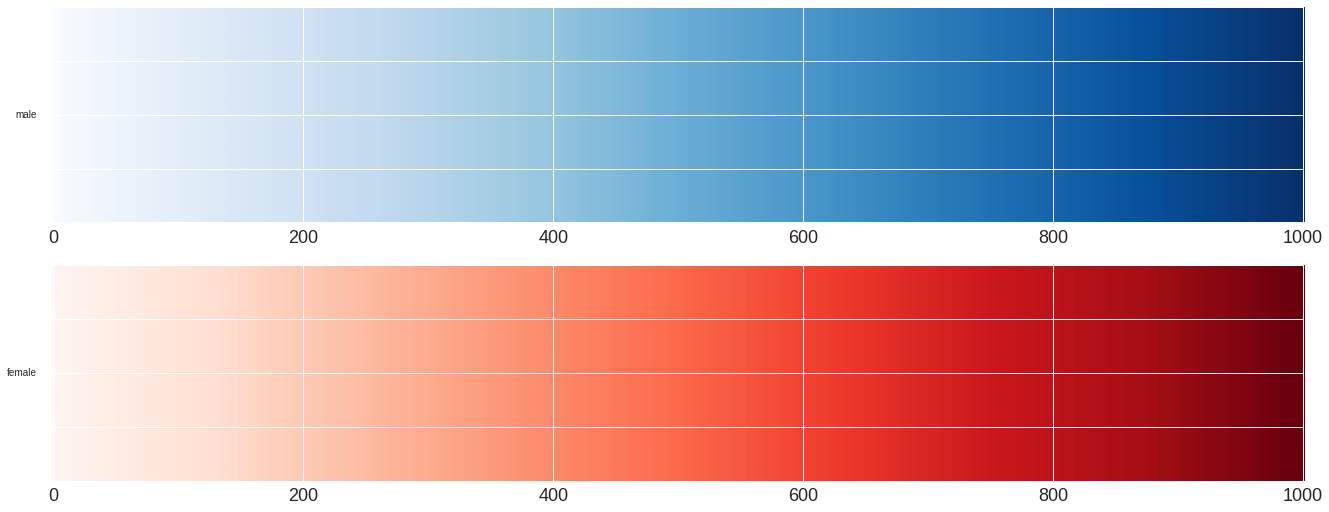

In [30]:
nrows = 2

def plot_axis(ax, lods, pheno, sex):
    gradient = np.vstack((lods, lods))
    sex_cmaps = {'female':'Reds', 'male':'Blues'}
    ax.imshow(gradient, aspect='auto', cmap=sex_cmaps[sex], vmin=0, vmax=np.ceil(max_lod))
    pos = list(ax.get_position().bounds)
    x_text = pos[0] - 0.01
    y_text = pos[1] + pos[3]/2.
    fig.text(x_text, y_text, sex, va='center', ha='right', fontsize=10)

fig, axes = pyplot.subplots(nrows=nrows)
fig.subplots_adjust(top=0.95, bottom=0.01, left=0.2, right=0.99)

for i,sex in enumerate(['male','female']):
    lods = np.arange(0, np.ceil(max_lod)+0.01, 0.01)
    plot_axis(axes[i], lods, pheno, sex)
    
for ax in axes:
    ax.tick_params(
        axis='y',
        which='both',
        left='off',
        right='off',
        labelleft='off')
    
    ax.tick_params(
        axis='x',
        which='both',
        width=1)
    
pyplot.savefig(os.path.join(rqtl_dir,'qtls_3d_plot_scalebar.pdf'))

Copy files to another node I can mount in my computer

In [31]:
%cp /n/holylfs/LABS/hoekstra_lab/hoekstrafs3/bendesky/genotyping/msg/20151111/rqtl/EPM/by_sex_qtls_3d_plot_20180327.pdf /n/hoekstrafs4/bendesky/qtl/
%cp /n/holylfs/LABS/hoekstra_lab/hoekstrafs3/bendesky/genotyping/msg/20151111/rqtl/EPM/qtls_3d_plot_scalebar.pdf /n/hoekstrafs4/bendesky/qtl/

## QTL scans to see if sex makes significant impact on QTL

QTL scans of males and females combined, using sex as an interactive covariate to detect QTL that have different effects on the two sexes.

In [8]:
%%R
all_scanone <- list()
sex <- as.numeric(pull.pheno(cross, "sex") == "M")

In [9]:
def scanone_perm_sex_covar(pheno):
    scanone_cmd = '''
        tryCatch({
            model <- "normal"
            method <- "hk"
            scanName <- model
            # Replace 0's in phenotype with the minimum observed for that phenotype before taking the log
            temp_pheno <- cross$pheno[["%s"]]
            smallest <- min(temp_pheno[which(temp_pheno>0)])
            temp_pheno[temp_pheno==0] <- smallest
            cross$pheno$log_temp_pheno <- log(temp_pheno)
            # scanone
            out.a <- scanone(cross, pheno="log_temp_pheno", model=model, method=method, addcovar=sex)
            out.i <- scanone(cross, pheno="log_temp_pheno", model=model, method=method, addcovar=sex, intcovar=sex)
            # scanone permutations
            seed <- ceiling(runif(1, 0, 10^8))
            set.seed(seed)
            operm.a <- scanone(cross, pheno="log_temp_pheno", model=model, method=method, addcovar=sex, perm.Xsp=TRUE, n.perm=numPerm, n.cluster=numClusters)
            set.seed(seed)
            operm.i <- scanone(cross, pheno="log_temp_pheno", model=model, method=method, addcovar=sex, intcovar=sex, perm.Xsp=TRUE, n.perm=numPerm, n.cluster=numClusters)
            # Add results to list
            all_scanone[["%s"]][["normal_hk_log"]]$out.a <- out.a
            all_scanone[["%s"]][["normal_hk_log"]]$out.i <- out.i
            all_scanone[["%s"]][["normal_hk_log"]]$operm.a <- operm.a
            all_scanone[["%s"]][["normal_hk_log"]]$operm.i <- operm.i
            }, error = function(err) {
                rm(out.a,out.i,operm.a,operm.i)
                print(paste("%s", err))
        })
        ''' % tuple([pheno for i in range(6)])
    return scanone_cmd

def do_scanone(scanone_cmd):
    robjects.r(scanone_cmd)

In [10]:
phenotypes_of_interest = [
    "frac_in_openArms",
    "frac_in_middle",    
    "entries_to_open",
    "entries_to_closed",
    "entries_o_c_ratio",
    "distance_in_open",
    "distance_in_closed",
    "distance_o_c_ratio",
    "speed_in_open",
    "speed_in_closed",
    "speed_o_c_ratio"
    ]

In [11]:
%%R
numPerm <- 3
numClusters <- 4

In [12]:
for p in phenotypes_of_interest[:1]:
    #skip phenotype if it has already been analyzed
    if robjects.r('"operm.i" %%in%% names(all_scanone$%s$normal_hk_log)' % p)[0]:
        print p, 'done'
        continue
    print 'Working on', p
    scanone_cmd = scanone_perm_sex_covar(p)
    do_scanone(scanone_cmd)
    robjects.r('save.image("%s")' % cross_path)
    print 'Done with', p

Working on frac_in_openArms
 -Running permutations via a cluster of 4 nodes.
 -Running permutations via a cluster of 4 nodes.
Done with frac_in_openArms


In [13]:
for p in phenotypes_of_interest:
    #skip phenotype if it has already been analyzed
    if robjects.r('"operm.i" %%in%% names(all_scanone$%s$normal_hk_log)' % p)[0]:
        print p, 'done'
        continue

frac_in_openArms done


These permutations that include sex as a covariate require between 64G and 128G memory and are slow, so will run as sbatch submissions

### Given how long it takes to perform all permutations for each phenotype, run them in parallel in SLURM

First save just the `cross` object, which is much smaller than the whole workspace.
Then this `cross` object can be loaded in each **sbatch** submission.

In [47]:
cross_object_path = os.path.join(rqtl_dir, 'cross.R')

In [10]:
%%R -i cross_object_path
save(cross, file = cross_object_path)

Create R file for each phenotype

In [11]:
phenotypes_of_interest = [
    "frac_in_openArms",
    "frac_in_middle",    
    "entries_to_open",
    "entries_to_closed",
    "entries_o_c_ratio",
    "distance_in_open",
    "distance_in_closed",
    "distance_o_c_ratio",
    "speed_in_open",
    "speed_in_closed",
    "speed_o_c_ratio"
    ]

In [14]:
import subprocess

In [18]:
for pheno in phenotypes_of_interest:
    # write R code file
    R_file = os.path.join(rqtl_dir,'R_code',pheno+'.R')
    sex_covar_file = os.path.join(rqtl_dir,'R_code','sex_covar_'+pheno+'.RData')
    with open(R_file, "w") as text_file:
        text_file.write(
    '''library(qtl)
load("%s")
sex <- as.numeric(pull.pheno(cross, "sex") == "M")
%s <- list()
numPerm <- 250
numClusters <- 4
model <- "normal"
method <- "hk"
scanName <- model
# Replace 0's in phenotype with the minimum observed for that phenotype before taking the log
temp_pheno <- cross$pheno[["%s"]]
smallest <- min(temp_pheno[which(temp_pheno>0)])
temp_pheno[temp_pheno==0] <- smallest
cross$pheno$log_temp_pheno <- log(temp_pheno)
# scanone
out.a <- scanone(cross, pheno="log_temp_pheno", model=model, method=method, addcovar=sex)
out.i <- scanone(cross, pheno="log_temp_pheno", model=model, method=method, addcovar=sex, intcovar=sex)
# scanone permutations
seed <- ceiling(runif(1, 0, 10^8))
set.seed(seed)
operm.a <- scanone(cross, pheno="log_temp_pheno", model=model, method=method, addcovar=sex, perm.Xsp=TRUE, n.perm=numPerm, n.cluster=numClusters)
set.seed(seed)
operm.i <- scanone(cross, pheno="log_temp_pheno", model=model, method=method, addcovar=sex, intcovar=sex, perm.Xsp=TRUE, n.perm=numPerm, n.cluster=numClusters)
%s[["normal_hk_log"]]$out.a <- out.a
%s[["normal_hk_log"]]$out.i <- out.i
%s[["normal_hk_log"]]$operm.a <- operm.a
%s[["normal_hk_log"]]$operm.i <- operm.i
save(%s, file = "%s")
    ''' % (cross_object_path, pheno, pheno, pheno, pheno, pheno, pheno, pheno, sex_covar_file))

    # write sbatch file
    sbatch_file = os.path.join(rqtl_dir,'R_code',pheno+'.sbatch')
    with open(sbatch_file, "w") as text_file:
        text_file.write(
    '''#!/usr/bin/env bash
#SBATCH -J %s
#SBATCH -o %s_slurm.out
#SBATCH -e %s_slurm.err
#SBATCH -p holyhoekstra,serial_requeue
#SBATCH -n 4
#SBATCH -t 23:50:00
#SBATCH --mem-per-cpu=128G

. new-modules.sh
module load centos6/R-3.0.2
R --vanilla < %s > %s 2> %s
touch %s
    ''' % (pheno, sbatch_file, sbatch_file, R_file, R_file+'.out', R_file+'.err', sbatch_file+'.done'))
    
    # Submit job
    subprocess.call(["sbatch", sbatch_file])

Gather data from each R file

In [20]:
%%R
sex_covar_scanone <- list()

In [21]:
for pheno in phenotypes_of_interest:
    # get data from each R file and add to sex_covar_scanone list
    sex_covar_file = os.path.join(rqtl_dir,'R_code','sex_covar_'+pheno+'.RData')    
    r_cmd = '''load("%s")
sex_covar_scanone[["%s"]][["normal_hk_log"]]$out.a <- %s[["normal_hk_log"]]$out.a
sex_covar_scanone[["%s"]][["normal_hk_log"]]$out.i <- %s[["normal_hk_log"]]$out.i
sex_covar_scanone[["%s"]][["normal_hk_log"]]$operm.a <- %s[["normal_hk_log"]]$operm.a
sex_covar_scanone[["%s"]][["normal_hk_log"]]$operm.i <- %s[["normal_hk_log"]]$operm.i
''' % (sex_covar_file, pheno, pheno, pheno, pheno, pheno, pheno, pheno, pheno)
    robjects.r(r_cmd)

### Plot results

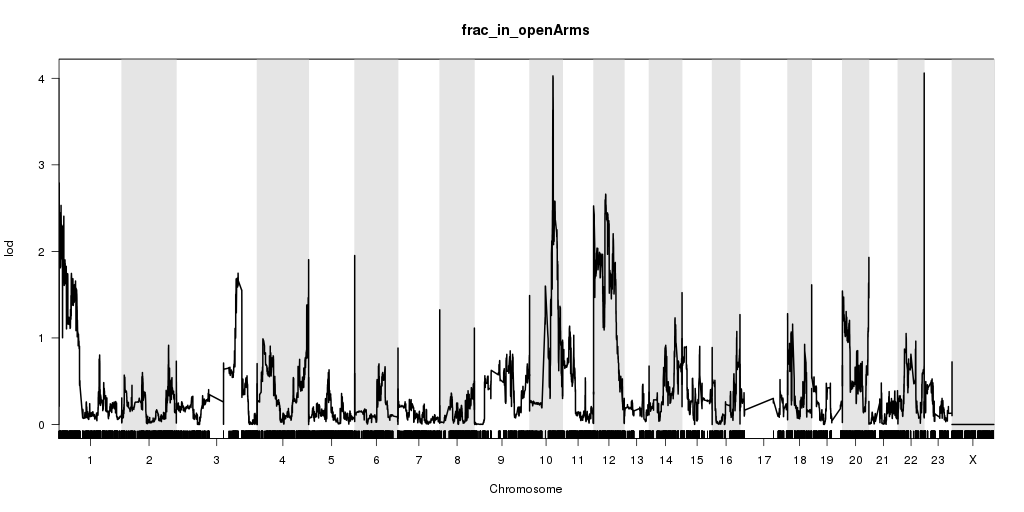

In [22]:
%%R -w 1024 -h 512
plot(sex_covar_scanone$frac_in_openArms$normal_hk_log$out.i-sex_covar_scanone$frac_in_openArms$normal_hk_log$out.a, bandcol = "gray90", main="frac_in_openArms")

In [28]:
%%R
PDFPath = "/n/holylfs/LABS/hoekstra_lab/hoekstrafs3/bendesky/genotyping/msg/20151111/rqtl/EPM/scan_sexcovar_20180404.pdf"  
pdf(file=PDFPath, height=9, width=7.5, paper="letter")
par(mfrow=c(2,1), cex=0.8)
scanName <- "normal_hk_log"
for (p in names(sex_covar_scanone)) {
    if (scanName %in% names(sex_covar_scanone[[p]])) {
        main <- bquote(.(p) ~ "normal hk log, sex covar, out.i - out.a")  
        plot(sex_covar_scanone[[p]][[scanName]]$out.i - sex_covar_scanone[[p]][[scanName]]$out.a,
            main=main,
            col=c("black"),
            incl.markers=FALSE,
            bandcol='gray80',
            gap=50000000,
            lty=1)
        
        # Plot thresholds from permutations
        usr <- par("usr")
        clip(usr[1],xaxisloc.scanone(sex_covar_scanone[[p]][[scanName]]$out.a, 'X', 0, gap=50000000)-50000000/1.7,0,100)
        # Autosomes
        thresh <- summary(sex_covar_scanone[[p]][[scanName]]$operm.i - sex_covar_scanone[[p]][[scanName]]$operm.a, alpha=0.05)$A
        abline(h=thresh, lty=2, col="dimgray")        
        # X chromosome
        clip(xaxisloc.scanone(out.males, 'X', 0, gap=50000000)-50000000/2,usr[2],0,100)
        thresh <- summary(sex_covar_scanone[[p]][[scanName]]$operm.i - sex_covar_scanone[[p]][[scanName]]$operm.a, alpha=0.05)$X
        abline(h=thresh, lty=2, col="dimgray")                
        }
    }
dev.off()

png 
  2 


Copy files to another node

In [29]:
%cp /n/holylfs/LABS/hoekstra_lab/hoekstrafs3/bendesky/genotyping/msg/20151111/rqtl/EPM/scan_sexcovar_20180404.pdf /n/hoekstrafs4/bendesky/qtl/

In [30]:
%%R -i cross_path
save.image(cross_path)

Plot results of scans with sex just as additive covariate

In [8]:
%%R
PDFPath = "/n/holylfs/LABS/hoekstra_lab/hoekstrafs3/bendesky/genotyping/msg/20151111/rqtl/EPM/scan_sex_add_covar_20180404.pdf"  
pdf(file=PDFPath, height=9, width=7.5, paper="letter")
par(mfrow=c(2,1), cex=0.8)
scanName <- "normal_hk_log"
for (p in names(sex_covar_scanone)) {
    if (scanName %in% names(sex_covar_scanone[[p]])) {
        main <- bquote(.(p) ~ "normal hk log, sex covar,out.a")  
        plot(sex_covar_scanone[[p]][[scanName]]$out.a,
            main=main,
            col=c("black"),
            incl.markers=FALSE,
            bandcol='gray80',
            gap=50000000,
            lty=1)
        
        # Plot thresholds from permutations
        usr <- par("usr")
        clip(usr[1],xaxisloc.scanone(sex_covar_scanone[[p]][[scanName]]$out.a, 'X', 0, gap=50000000)-50000000/1.7,0,100)
        # Autosomes
        thresh <- summary(sex_covar_scanone[[p]][[scanName]]$operm.a, alpha=0.05)$A
        abline(h=thresh, lty=2, col="dimgray")        
        # X chromosome
        clip(xaxisloc.scanone(out.males, 'X', 0, gap=50000000)-50000000/2,usr[2],0,100)
        thresh <- summary(sex_covar_scanone[[p]][[scanName]]$operm.a, alpha=0.05)$X
        abline(h=thresh, lty=2, col="dimgray")                
        }
    }
dev.off()

png 
  2 


In [9]:
%cp /n/holylfs/LABS/hoekstra_lab/hoekstrafs3/bendesky/genotyping/msg/20151111/rqtl/EPM/scan_sex_add_covar_20180404.pdf /n/hoekstrafs4/bendesky/qtl/

Scans with normal model, hk method, and log transformed phenotypes look very different from non paremtric scans of raw phenotypes, so try a different transformation.

In [9]:
phenotypes_of_interest = [
    "frac_in_openArms",
    "frac_in_middle",    
    "entries_to_open",
    "entries_to_closed",
    "entries_o_c_ratio",
    "distance_in_open",
    "distance_in_closed",
    "distance_o_c_ratio",
    "speed_in_open",
    "speed_in_closed",
    "speed_o_c_ratio"
    ]

In [11]:
import subprocess

Do scans without permutations first

In [20]:
%%R
model <- "normal"
method <- "hk"
scanName <- model
# Replace 0's in phenotype with the minimum observed for that phenotype before taking the log
temp_pheno <- cross$pheno$"frac_in_openArms"
smallest <- min(temp_pheno[which(temp_pheno>0)])
temp_pheno[temp_pheno==0] <- smallest
cross$pheno$log_temp_pheno <- log(temp_pheno)
# scanone
out.a <- scanone(cross, pheno="log_temp_pheno", model=model, method=method, addcovar=sex)

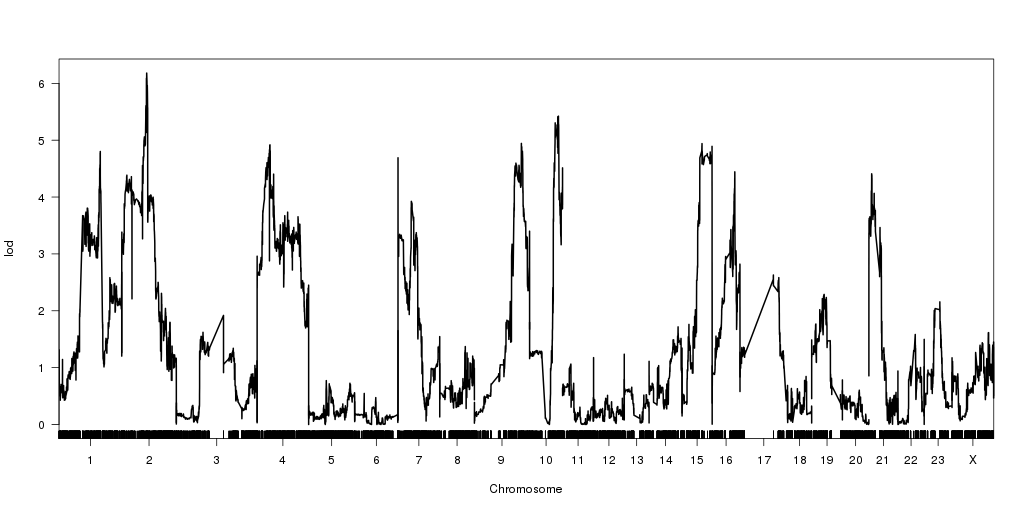

In [21]:
%%R -w 1024 -h 512
plot(out.a)

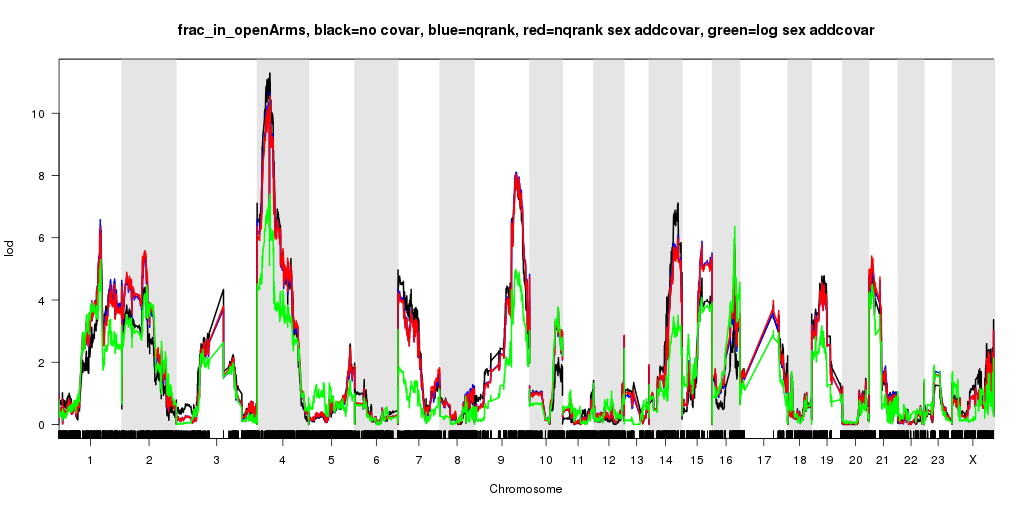

In [19]:
%%R -w 1024 -h 512
sex <- as.numeric(pull.pheno(cross, "sex") == "M")
fraction_open_hk <- scanone(cross,pheno="frac_in_openArms",model='normal',method='hk')
fraction_open_nqrank <- scanone(cross,pheno=nqrank(cross$pheno$"frac_in_openArms"),model='normal',method='hk')
fraction_open_hk_nqrank_sexcovar <- scanone(cross,pheno=nqrank(cross$pheno$"frac_in_openArms"),addcovar=sex,model='normal',method='hk')
fraction_open_hk_log_sexcovar <- scanone(cross,pheno=log(cross$pheno$"frac_in_openArms"),addcovar=sex,model='normal',method='hk')
plot(fraction_open_hk,fraction_open_nqrank,fraction_open_hk_nqrank_sexcovar,bandcol = "gray90", col=c('black','blue','red'), main="frac_in_openArms, black=no covar, blue=nqrank, red=nqrank sex addcovar, green=log sex addcovar")
plot(fraction_open_hk_log_sexcovar, col='green', add=TRUE)

### Scans with nqrank normalized values

Scans for `entries_o_c_ratio` and `speed_o_c_ratio` with nqrank donn't work because they have some `Inf` values.  
Convert those values to the max observed + 1 before scanone

In [95]:
for pheno in phenotypes_of_interest:
    # write R code file
    R_file = os.path.join(rqtl_dir,'R_code','nqrank',pheno+'.R')
    sex_covar_file = os.path.join(rqtl_dir,'R_code','nqrank','sex_covar_'+pheno+'.RData')
    with open(R_file, "w") as text_file:
        text_file.write(
    '''library(qtl)
load("%s")
sex <- as.numeric(pull.pheno(cross, "sex") == "M")
%s <- list()
numPerm <- 1000
numClusters <- 4
model <- "normal"
method <- "hk"
scanName <- model

# Replace Inf values with largest value observed for that pheno + 1
temp_pheno <- cross$pheno$"%s"
largest <- max(temp_pheno[-which(!is.finite(temp_pheno))])
temp_pheno[is.infinite(temp_pheno)] <- largest + 1
cross$pheno$temp_pheno <- temp_pheno

# scanone
out.a <- scanone(cross, pheno=nqrank(cross$pheno$"temp_pheno"), model=model, method=method, addcovar=sex)
out.i <- scanone(cross, pheno=nqrank(cross$pheno$"temp_pheno"), model=model, method=method, addcovar=sex, intcovar=sex)
# scanone permutations
seed <- ceiling(runif(1, 0, 10^8))
set.seed(seed)
operm.a <- scanone(cross, pheno=nqrank(cross$pheno$"temp_pheno"), model=model, method=method, addcovar=sex, perm.Xsp=TRUE, n.perm=numPerm, n.cluster=numClusters)
set.seed(seed)
operm.i <- scanone(cross, pheno=nqrank(cross$pheno$"temp_pheno"), model=model, method=method, addcovar=sex, intcovar=sex, perm.Xsp=TRUE, n.perm=numPerm, n.cluster=numClusters)
%s[["normal_hk_log"]]$out.a <- out.a
%s[["normal_hk_log"]]$out.i <- out.i
%s[["normal_hk_log"]]$operm.a <- operm.a
%s[["normal_hk_log"]]$operm.i <- operm.i
save(%s, file = "%s")
    ''' % ((cross_object_path,) + tuple([pheno for i in range(7)]) + (sex_covar_file,)))

    # write sbatch file
    sbatch_file = os.path.join(rqtl_dir,'R_code','nqrank',pheno+'.sbatch')
    with open(sbatch_file, "w") as text_file:
        text_file.write(
    '''#!/usr/bin/env bash
#SBATCH -J %s
#SBATCH -o %s_slurm.out
#SBATCH -e %s_slurm.err
#SBATCH -p holyhoekstra,serial_requeue
#SBATCH -n 4
#SBATCH -t 20:00:00
#SBATCH --mem-per-cpu=128G

. new-modules.sh
module load centos6/R-3.0.2
R --vanilla < %s > %s 2> %s
touch %s
    ''' % (pheno, sbatch_file, sbatch_file, R_file, R_file+'.out', R_file+'.err', sbatch_file+'.done'))
    
    # Submit job
    subprocess.call(["sbatch", sbatch_file])

Gather data from each R file

In [10]:
for pheno in phenotypes_of_interest:
    # get data from each R file and add to sex_covar_scanone list
    sex_covar_file = os.path.join(rqtl_dir,'R_code','nqrank','sex_covar_'+pheno+'.RData')    
    r_cmd = '''load("%s")
sex_covar_scanone[["%s"]][["normal_hk_nqrank"]]$out.a <- %s[["normal_hk_log"]]$out.a
sex_covar_scanone[["%s"]][["normal_hk_nqrank"]]$out.i <- %s[["normal_hk_log"]]$out.i
sex_covar_scanone[["%s"]][["normal_hk_nqrank"]]$operm.a <- %s[["normal_hk_log"]]$operm.a
sex_covar_scanone[["%s"]][["normal_hk_nqrank"]]$operm.i <- %s[["normal_hk_log"]]$operm.i
''' % (sex_covar_file, pheno, pheno, pheno, pheno, pheno, pheno, pheno, pheno)
    try:
        robjects.r(r_cmd)
    except:
        continue

### Plot results

In [11]:
%%R
PDFPath = "/n/holylfs/LABS/hoekstra_lab/hoekstrafs3/bendesky/genotyping/msg/20151111/rqtl/EPM/scan_sexcovar_nqrank_20180412.pdf"  
pdf(file=PDFPath, height=9, width=7.5, paper="letter")
par(mfrow=c(2,1), cex=0.8)
scanName <- "normal_hk_nqrank"
for (p in names(sex_covar_scanone)) {
    if (scanName %in% names(sex_covar_scanone[[p]])) {
        main <- bquote(.(p) ~ "normal hk nqrank, sex covar, out.i - out.a")  
        plot(sex_covar_scanone[[p]][[scanName]]$out.a, sex_covar_scanone[[p]][[scanName]]$out.i - sex_covar_scanone[[p]][[scanName]]$out.a,
            main=main,
            col=c("black","purple"),
            incl.markers=FALSE,
            bandcol='gray80',
            gap=50000000,
            lty=1)
        
        # Plot thresholds from permutations
        usr <- par("usr")
        clip(usr[1],xaxisloc.scanone(sex_covar_scanone[[p]][[scanName]]$out.a, 'X', 0, gap=50000000)-50000000/1.7,0,100)
        # Autosomes
        thresh <- summary(sex_covar_scanone[[p]][[scanName]]$operm.a, alpha=0.05)$A
        abline(h=thresh, lty=2, col="black")
        thresh <- summary(sex_covar_scanone[[p]][[scanName]]$operm.i - sex_covar_scanone[[p]][[scanName]]$operm.a, alpha=0.05)$A
        abline(h=thresh, lty=2, col="purple")        
        # X chromosome
        clip(xaxisloc.scanone(out.males, 'X', 0, gap=50000000)-50000000/2,usr[2],0,100)
        thresh <- summary(sex_covar_scanone[[p]][[scanName]]$operm.a, alpha=0.05)$X
        abline(h=thresh, lty=2, col="black")                
        thresh <- summary(sex_covar_scanone[[p]][[scanName]]$operm.i - sex_covar_scanone[[p]][[scanName]]$operm.a, alpha=0.05)$X
        abline(h=thresh, lty=2, col="purple")                
        }
    }
dev.off()

png 
  2 


In [12]:
%cp /n/holylfs/LABS/hoekstra_lab/hoekstrafs3/bendesky/genotyping/msg/20151111/rqtl/EPM/scan_sexcovar_nqrank_20180412.pdf /n/hoekstrafs4/bendesky/qtl/

In [13]:
%%R -i cross_path
save.image(cross_path)

Plot results of np scans of sexes combined and normal hk rank scans with sex as additive covariate

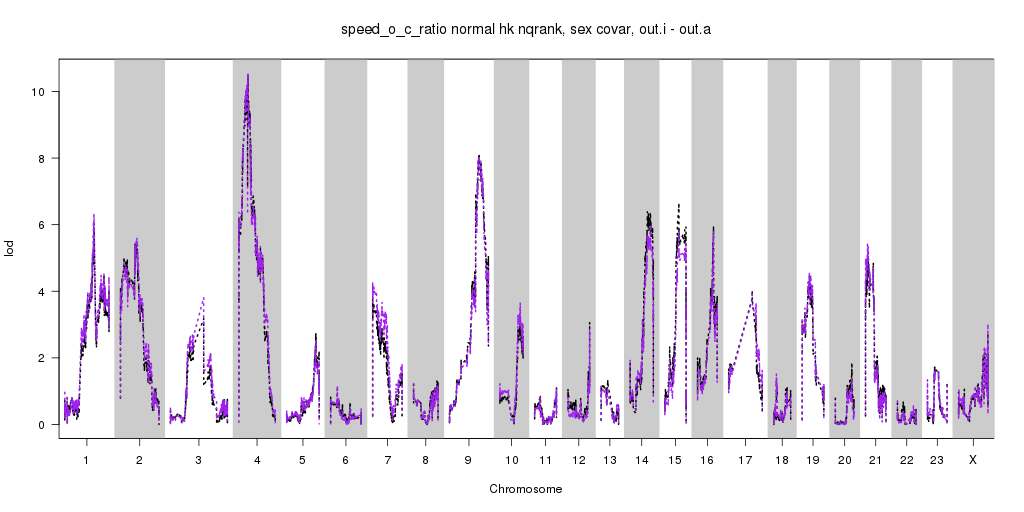

In [16]:
%%R -w 1024 -h 512
plot(maleAndFemale_scanone$frac_in_openArms$np$out, sex_covar_scanone$frac_in_openArms$normal_hk_nqrank$out.a,
    main=main,
    col=c("black","purple"),
    incl.markers=FALSE,
    bandcol='gray80',
    gap=50000000,
    lty="dotted")

In [19]:
%%R
PDFPath = "/n/holylfs/LABS/hoekstra_lab/hoekstrafs3/bendesky/genotyping/msg/20151111/rqtl/EPM/scan_np_and_sex_add_covar_nqrank_20180418.pdf"  
pdf(file=PDFPath, height=9, width=7.5, paper="letter")
par(mfrow=c(2,1), cex=0.8)
for (p in names(sex_covar_scanone)) {
    if ("normal_hk_nqrank" %in% names(sex_covar_scanone[[p]])) {
        main <- bquote(.(p) ~ "black=np scan sexes combined; purple=normal hk nqrank, sex add covar")  
        plot(maleAndFemale_scanone[[p]]$np$out, sex_covar_scanone[[p]]$normal_hk_nqrank$out.a,
            main=main,
            col=c("black","purple"),
            incl.markers=FALSE,
            bandcol='gray80',
            gap=50000000,
            lty="dotted")
        
        # Plot thresholds from permutations
        usr <- par("usr")
        clip(usr[1],xaxisloc.scanone(sex_covar_scanone[[p]]$normal_hk_nqrank$out.a, 'X', 0, gap=50000000)-50000000/1.7,0,100)
        # Autosomes
        thresh <- summary(maleAndFemale_scanone[[p]]$np$perm, alpha=0.05)$A
        abline(h=thresh, lty=2, col="black") 
        thresh <- summary(sex_covar_scanone[[p]]$normal_hk_nqrank$operm.a, alpha=0.05)$A
        abline(h=thresh, lty=2, col="purple")
        # X chromosome
        clip(xaxisloc.scanone(out.males, 'X', 0, gap=50000000)-50000000/2,usr[2],0,100)        
        thresh <- summary(maleAndFemale_scanone[[p]]$np$perm, alpha=0.05)$X
        abline(h=thresh, lty=2, col="black")        
        thresh <- summary(sex_covar_scanone[[p]]$normal_hk_nqrank$operm.a, alpha=0.05)$X
        abline(h=thresh, lty=2, col="purple")                
        }
    }
dev.off()

png 
  2 


In [20]:
%cp /n/holylfs/LABS/hoekstra_lab/hoekstrafs3/bendesky/genotyping/msg/20151111/rqtl/EPM/scan_np_and_sex_add_covar_nqrank_20180418.pdf /n/hoekstrafs4/bendesky/qtl/

-----------------------------

In [34]:
%%R
summary(sex_covar_scanone$distance_o_c_ratio$normal_hk_log$out.i-sex_covar_scanone$distance_o_c_ratio$normal_hk_log$out.a)

               chr      pos   lod
1:480396         1 4.80e+05 1.674
2:143684612      2 1.44e+08 0.880
3:188783318      3 1.89e+08 1.399
4:157918215      4 1.58e+08 1.364
5:141379231      5 1.41e+08 1.667
6:2925           6 2.92e+03 3.495
7:128022837      7 1.28e+08 2.498
8b:106207021     8 1.06e+08 1.363
9:169239535      9 1.69e+08 0.687
10:71644795     10 7.16e+07 5.749
11:21446636     11 2.14e+07 0.899
12:111127       12 1.11e+05 2.210
13:633497       13 6.33e+05 0.493
14:79606142     14 7.96e+07 1.522
15:28541        15 2.85e+04 1.254
8a:74825343     16 7.48e+07 0.681
17:27476        17 2.75e+04 1.112
18:15445165     18 1.54e+07 1.223
19:13567        19 1.36e+04 1.079
20:81216361     20 8.12e+07 1.333
16-21:92085063  21 9.21e+07 0.365
22:80618014     22 8.06e+07 3.241
23:27312385     23 2.73e+07 0.784
X:63390082       X 6.34e+07 0.000


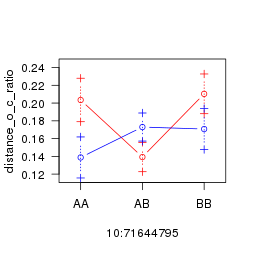

In [38]:
%%R -w 256 -h 256
effectplot(cross, pheno="distance_o_c_ratio", mname1="sex", mname2="10:71644795", main="", add.legend=FALSE)

#Plot phenotype distributions

In [22]:
cross_pheno_pd = robjects.r('cross$pheno')
cross_pheno_pd.columns

Index([u'id', u'sex', u'frac_in_closedAndMiddle', u'frac_in_closedArms',
       u'frac_in_middle', u'frac_in_openArms', u'entries_to_closed',
       u'entries_to_open', u'distance_in_closed', u'distance_in_open',
       u'speed_in_closed', u'speed_in_open', u'entries_o_c_ratio',
       u'distance_o_c_ratio', u'speed_o_c_ratio', u'total_frames',
       u'tested_more_than_once', u'pgm', u'frac_entries_to_open',
       u'frac_distance_in_open'],
      dtype='object')

In [23]:
cross_pheno_pd.iloc[:5]

id sex  frac_in_closedAndMiddle  frac_in_closedArms  \
2    indiv767_DUMMY   F                 0.867611            0.805050   
3    indiv768_DUMMY   M                 0.954012            0.907493   
5    indiv769_DUMMY   M                 0.641230            0.540040   
270  indiv770_DUMMY   F                 0.766712            0.638178   
4    indiv771_DUMMY   M                 0.815090            0.733981   

     frac_in_middle  frac_in_openArms  entries_to_closed  entries_to_open  \
2          0.062562          0.074793                 33                7   
3          0.046519          0.011955                 10                1   
5          0.101189          0.323936                 43               36   
270        0.128534          0.202602                 41               38   
4          0.081109          0.152260                 23               17   

     distance_in_closed  distance_in_open  speed_in_closed  speed_in_open  \
2          11172.197633        648.290246        16.279752       7.980223   
3           6691.292891         25.924610         1.178804            NaN   
5          16684.669196       5373.086495        32.219911      26.928862   
270        13801.361360       2454.792131        27.611815      22.215921   
4          13222.649452       1441.487413        17.775511      15.273263   

     entries_o_c_ratio  distance_o_c_ratio  speed_o_c_ratio  total_frames  \
2             0.212121            0.058027         0.490193          8980   
3             0.100000            0.003874              NaN          8958   
5             0.837209            0.322037         0.835783          8999   
270           0.926829            0.177866         0.804580          8981   
4             0.739130            0.109017         0.859231          8999   

    tested_more_than_once  pgm  frac_entries_to_open  frac_distance_in_open  
2                   False    0              0.175000               0.054845  
3                   False    0              0.090909               0.003859  
5                   False    0              0.455696               0.243592  
270                 False    0              0.481013               0.151007  
4                   False    0              0.425000               0.098300

Replace `Inf` values with `NaN`

In [38]:
cross_pheno_pd = cross_pheno_pd.replace([np.inf, -np.inf], np.nan).dropna()

In [24]:
import seaborn

Plot distributions of all phenotypes

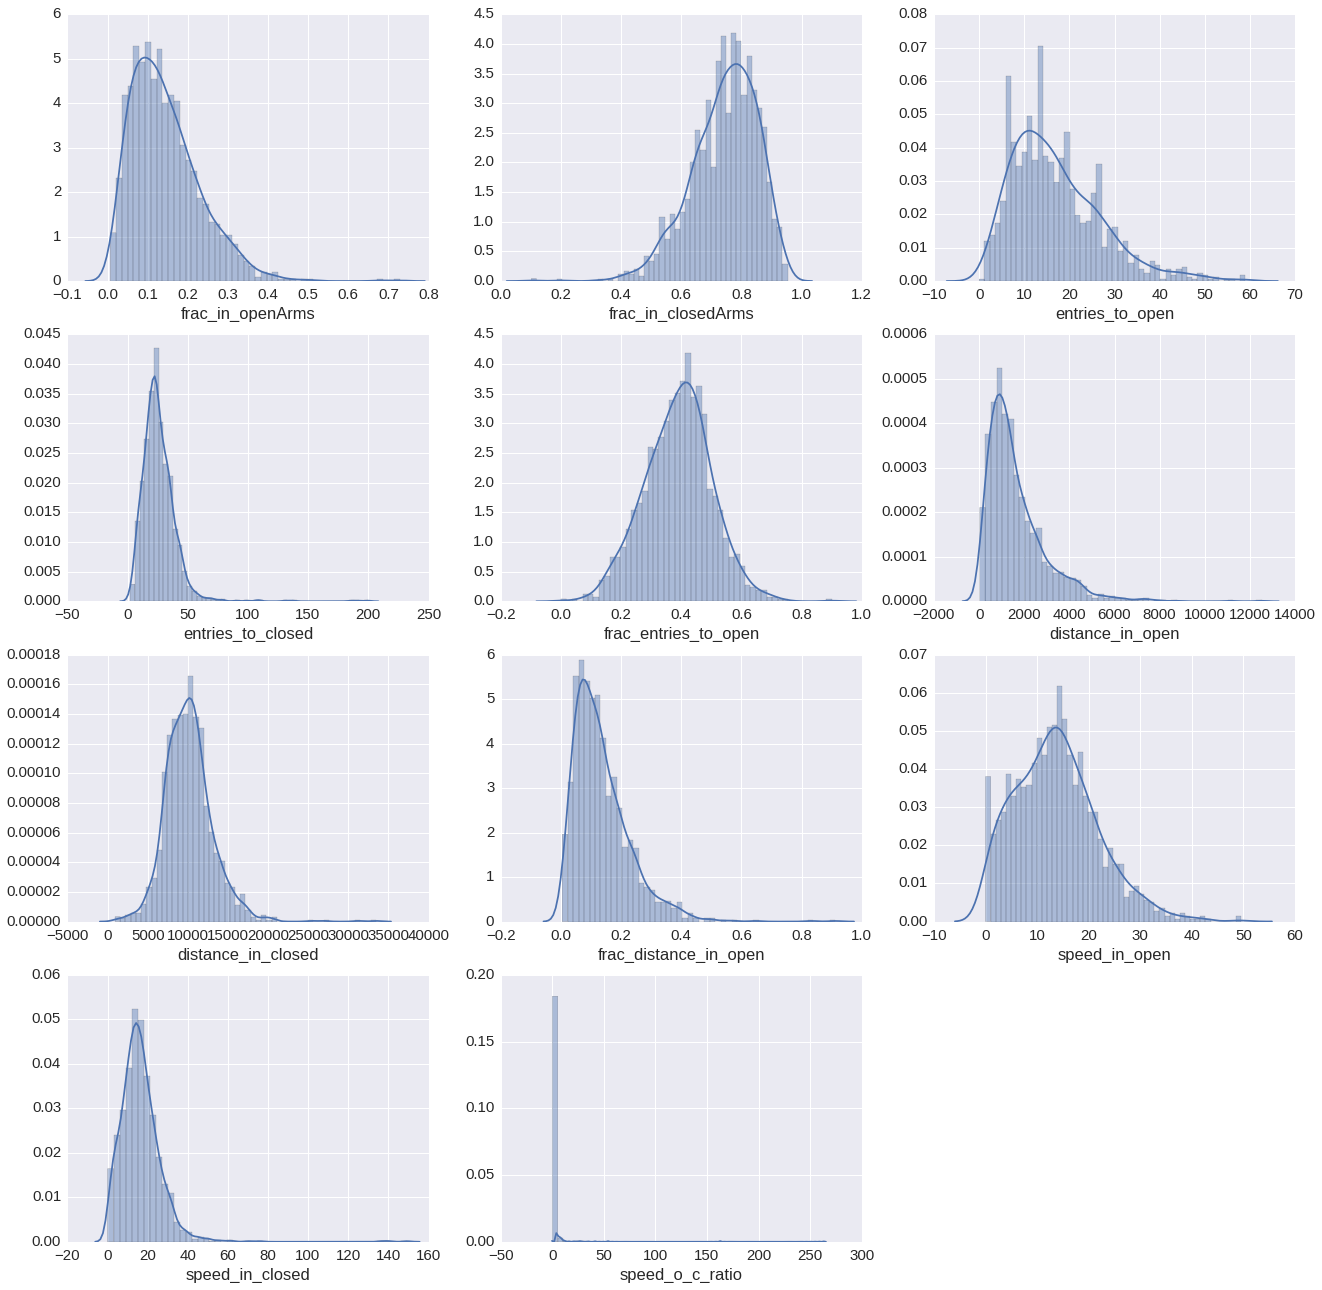

In [64]:
with seaborn.plotting_context("notebook", font_scale=1.5, rc={"figure.figsize": (22,22)}):
    for i,p in enumerate(phenotypes_of_interest):
        pyplot.subplot(4,3,i+1)
        ax = seaborn.distplot(cross_pheno_pd[p], bins=50, kde=True, vertical=False);

Plot distributions of `log10(phenotypes)`.  
Replace 0's with 0.9 of the lowest value (other than 0) for that phenotype.

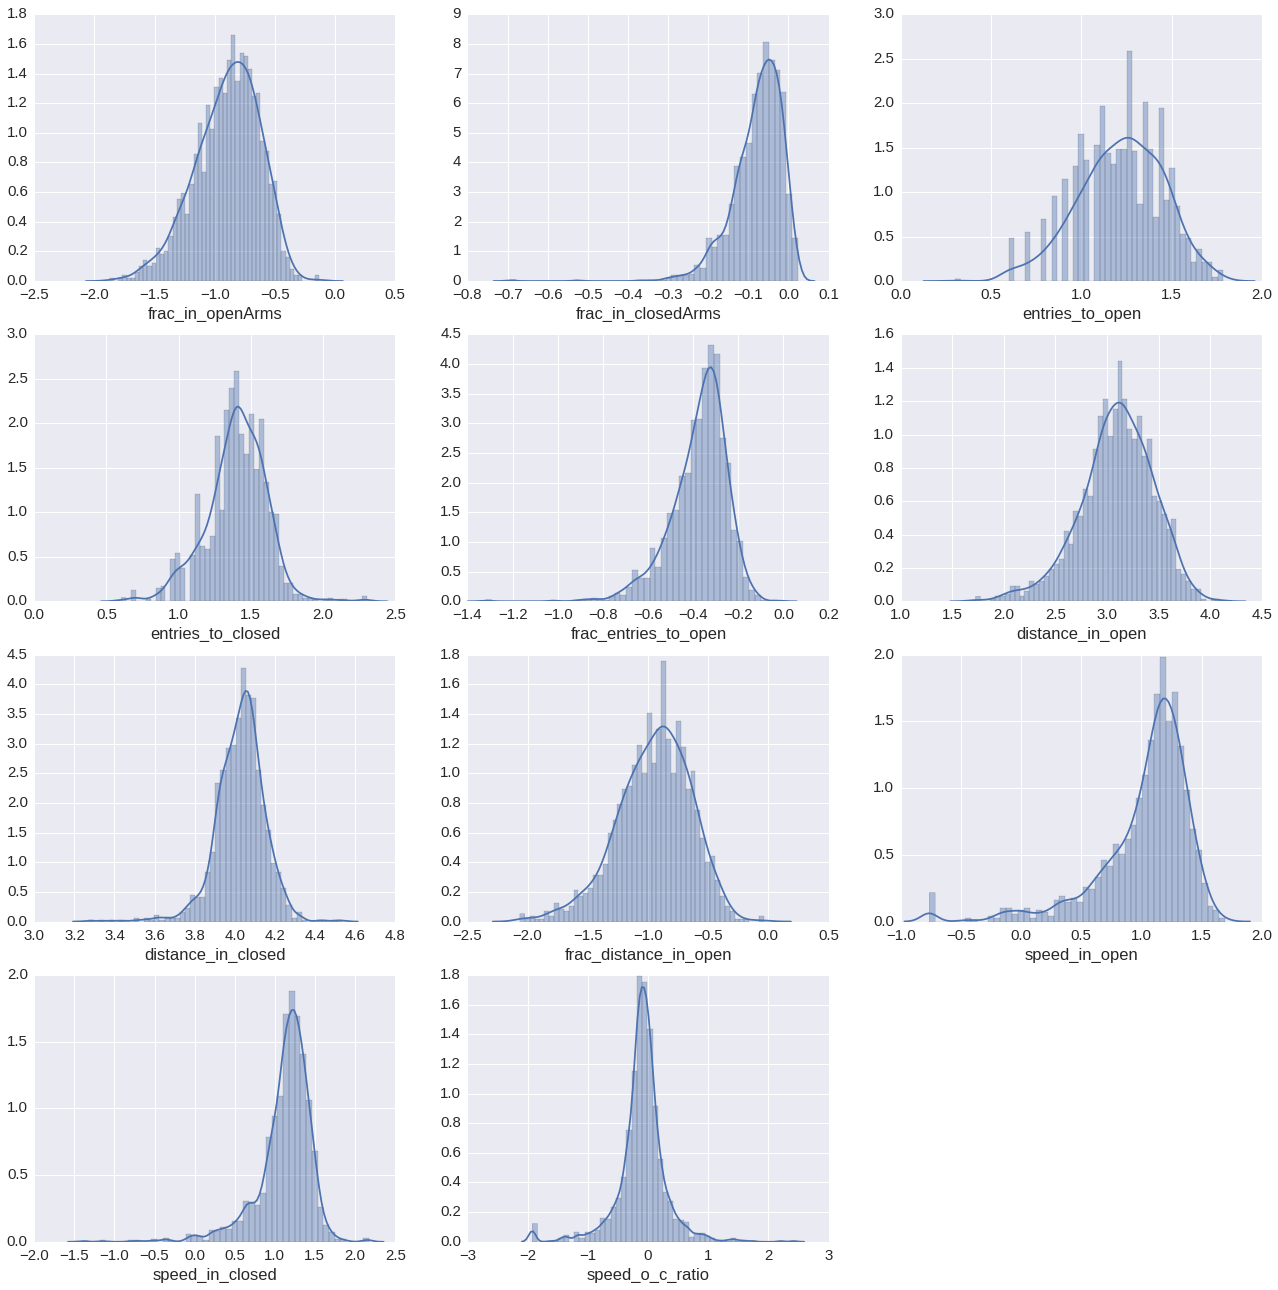

In [104]:
with seaborn.plotting_context("notebook", font_scale=1.5, rc={"figure.figsize": (22,22)}):
    for i,p in enumerate(phenotypes_of_interest):
        pyplot.subplot(4,3,i+1)
        ax = seaborn.distplot(np.log10(cross_pheno_pd[p]+cross_pheno_pd[p][cross_pheno_pd[p] > 0].min()), bins=50, kde=True, vertical=False);

Log phenotypes look more normal than their non-log counterparts, so better use the logs for parametric QTL mapping

####Now plot pairwise correlations of behaviors

Convert columns to log, after adding the minimum value of each phenotype (other than 0) to each value to avoid taking log of 0

In [115]:
cross_pheno_log_pd = cross_pheno_pd.copy()

In [116]:
for p in phenotypes_of_interest:
    cross_pheno_log_pd[p] = np.log10(cross_pheno_log_pd[p]+cross_pheno_log_pd[p][cross_pheno_log_pd[p] > 0].min())

Keep only columns of interest for pairwise comparisons

In [125]:
cross_pheno_log_pd = cross_pheno_log_pd[phenotypes_of_interest + ['sex']]

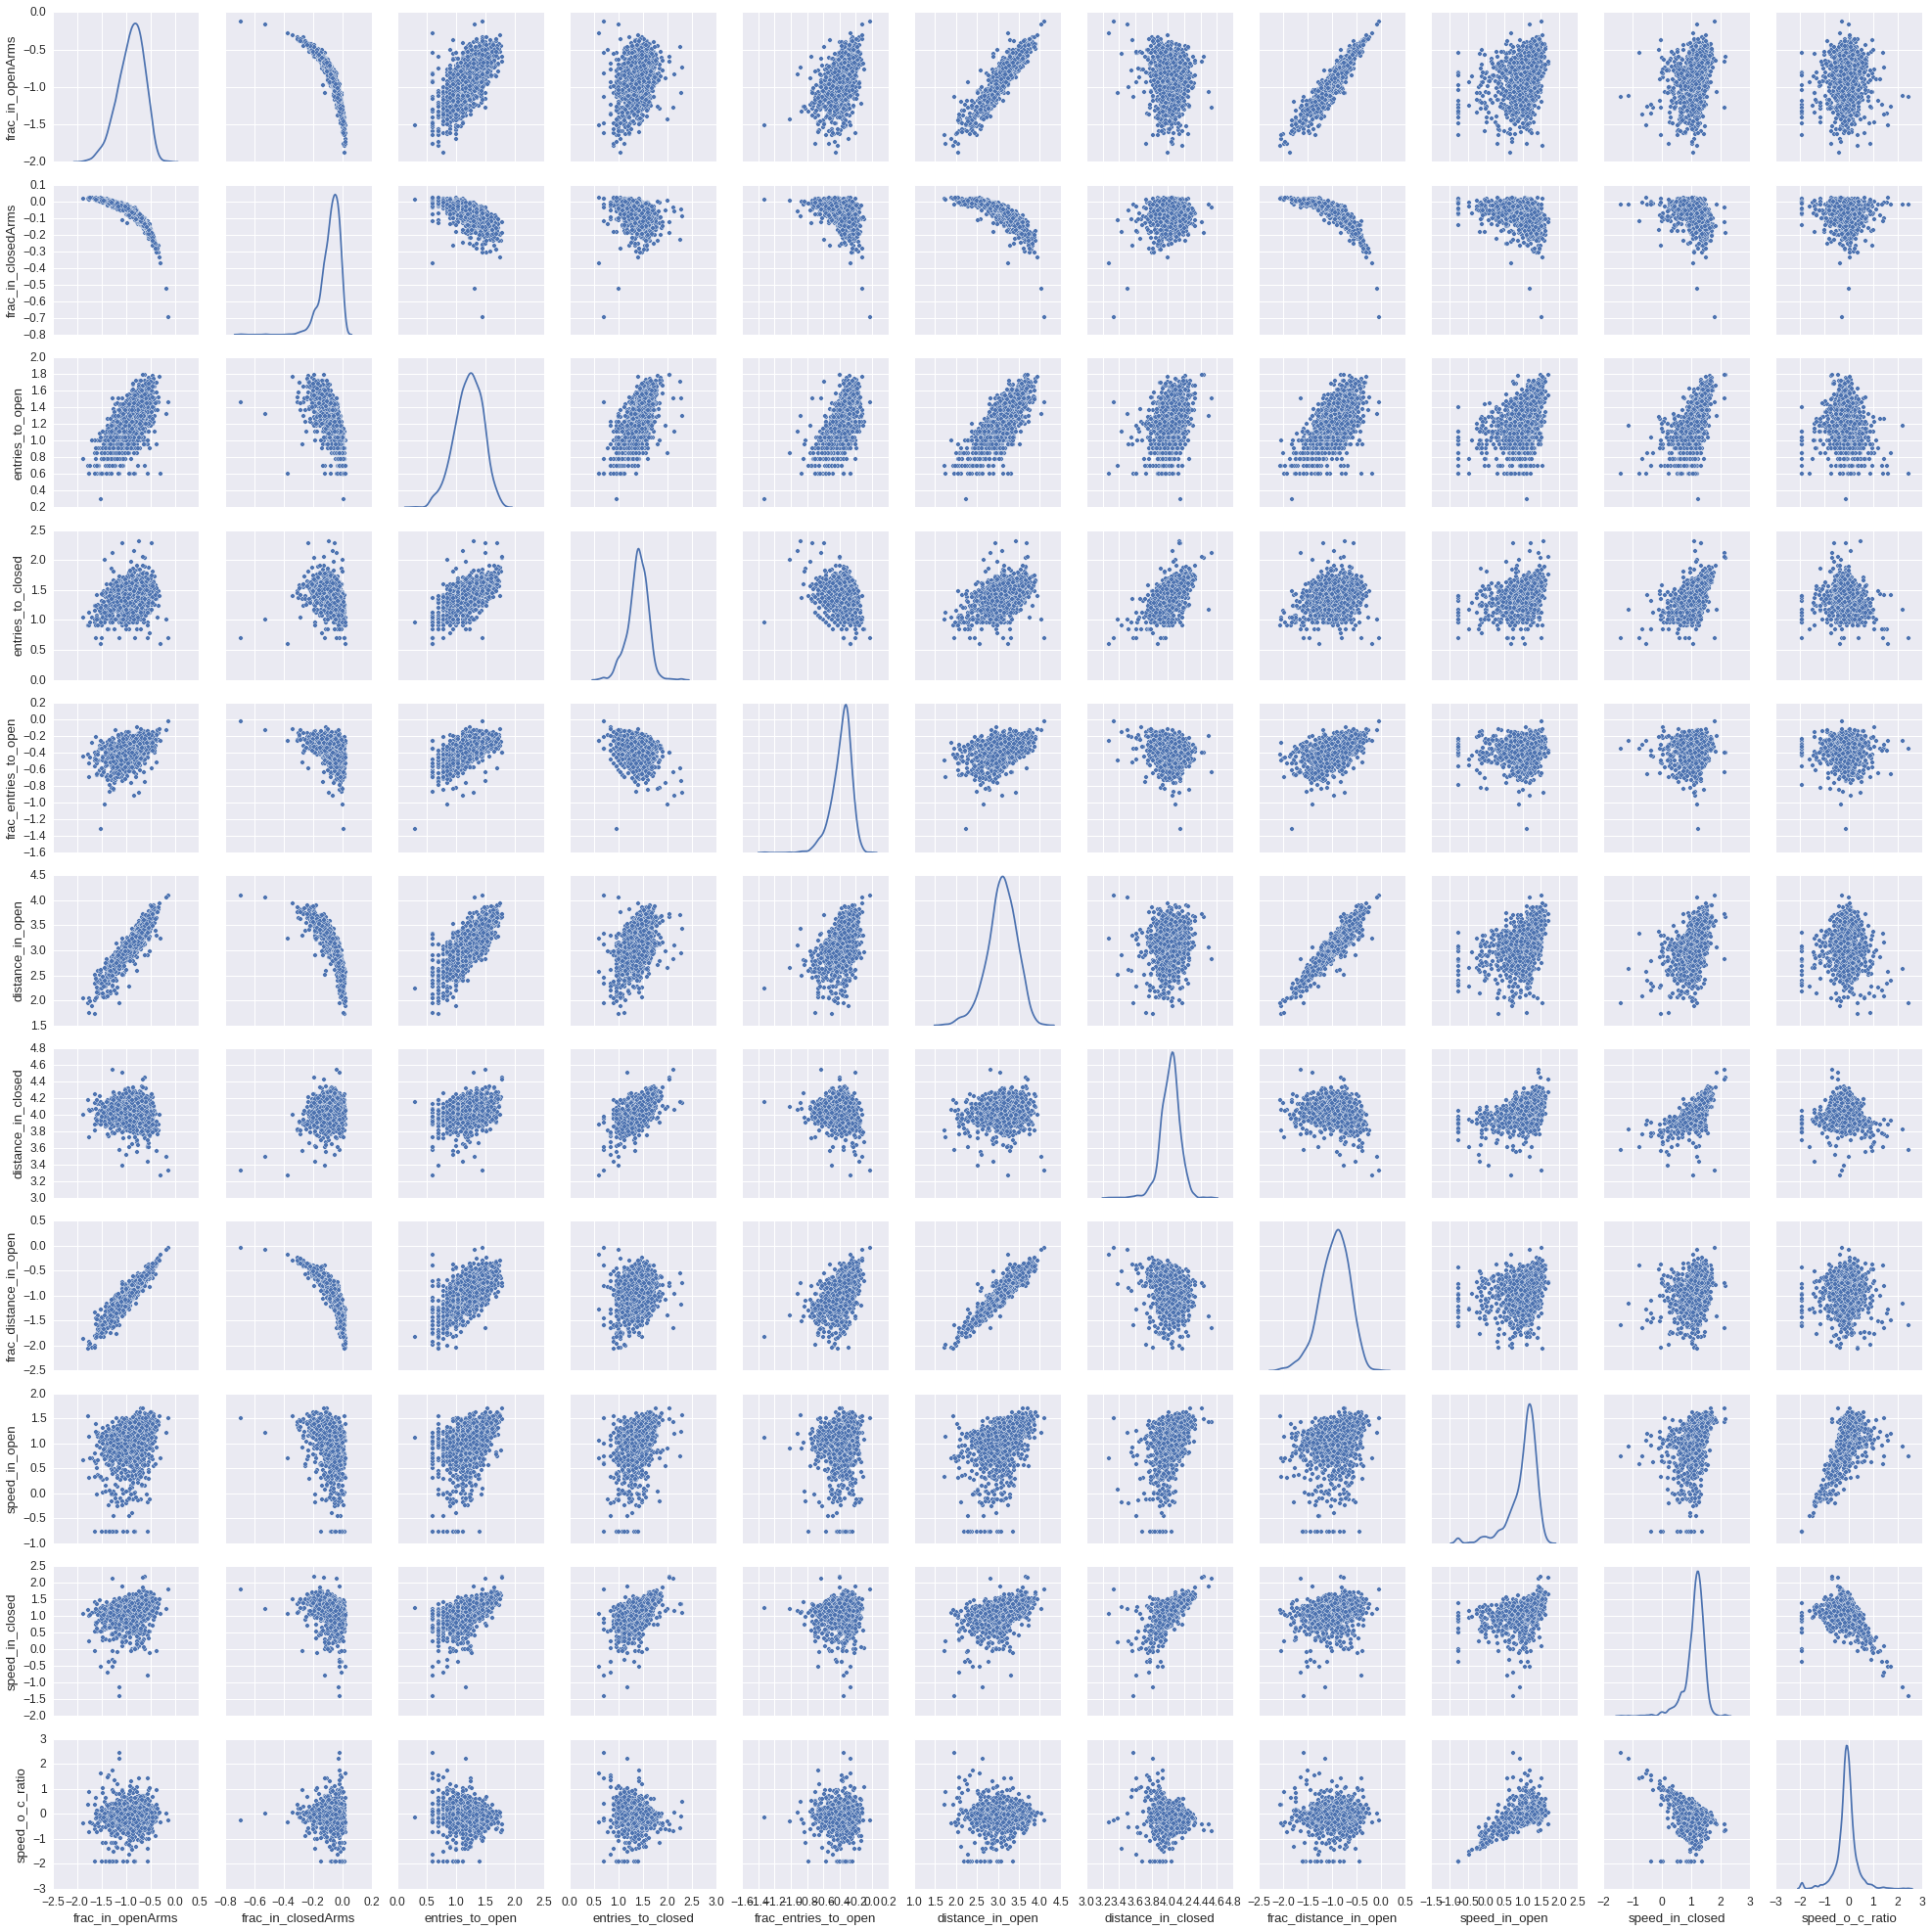

In [132]:
seaborn.pairplot(cross_pheno_log_pd, diag_kind='kde');

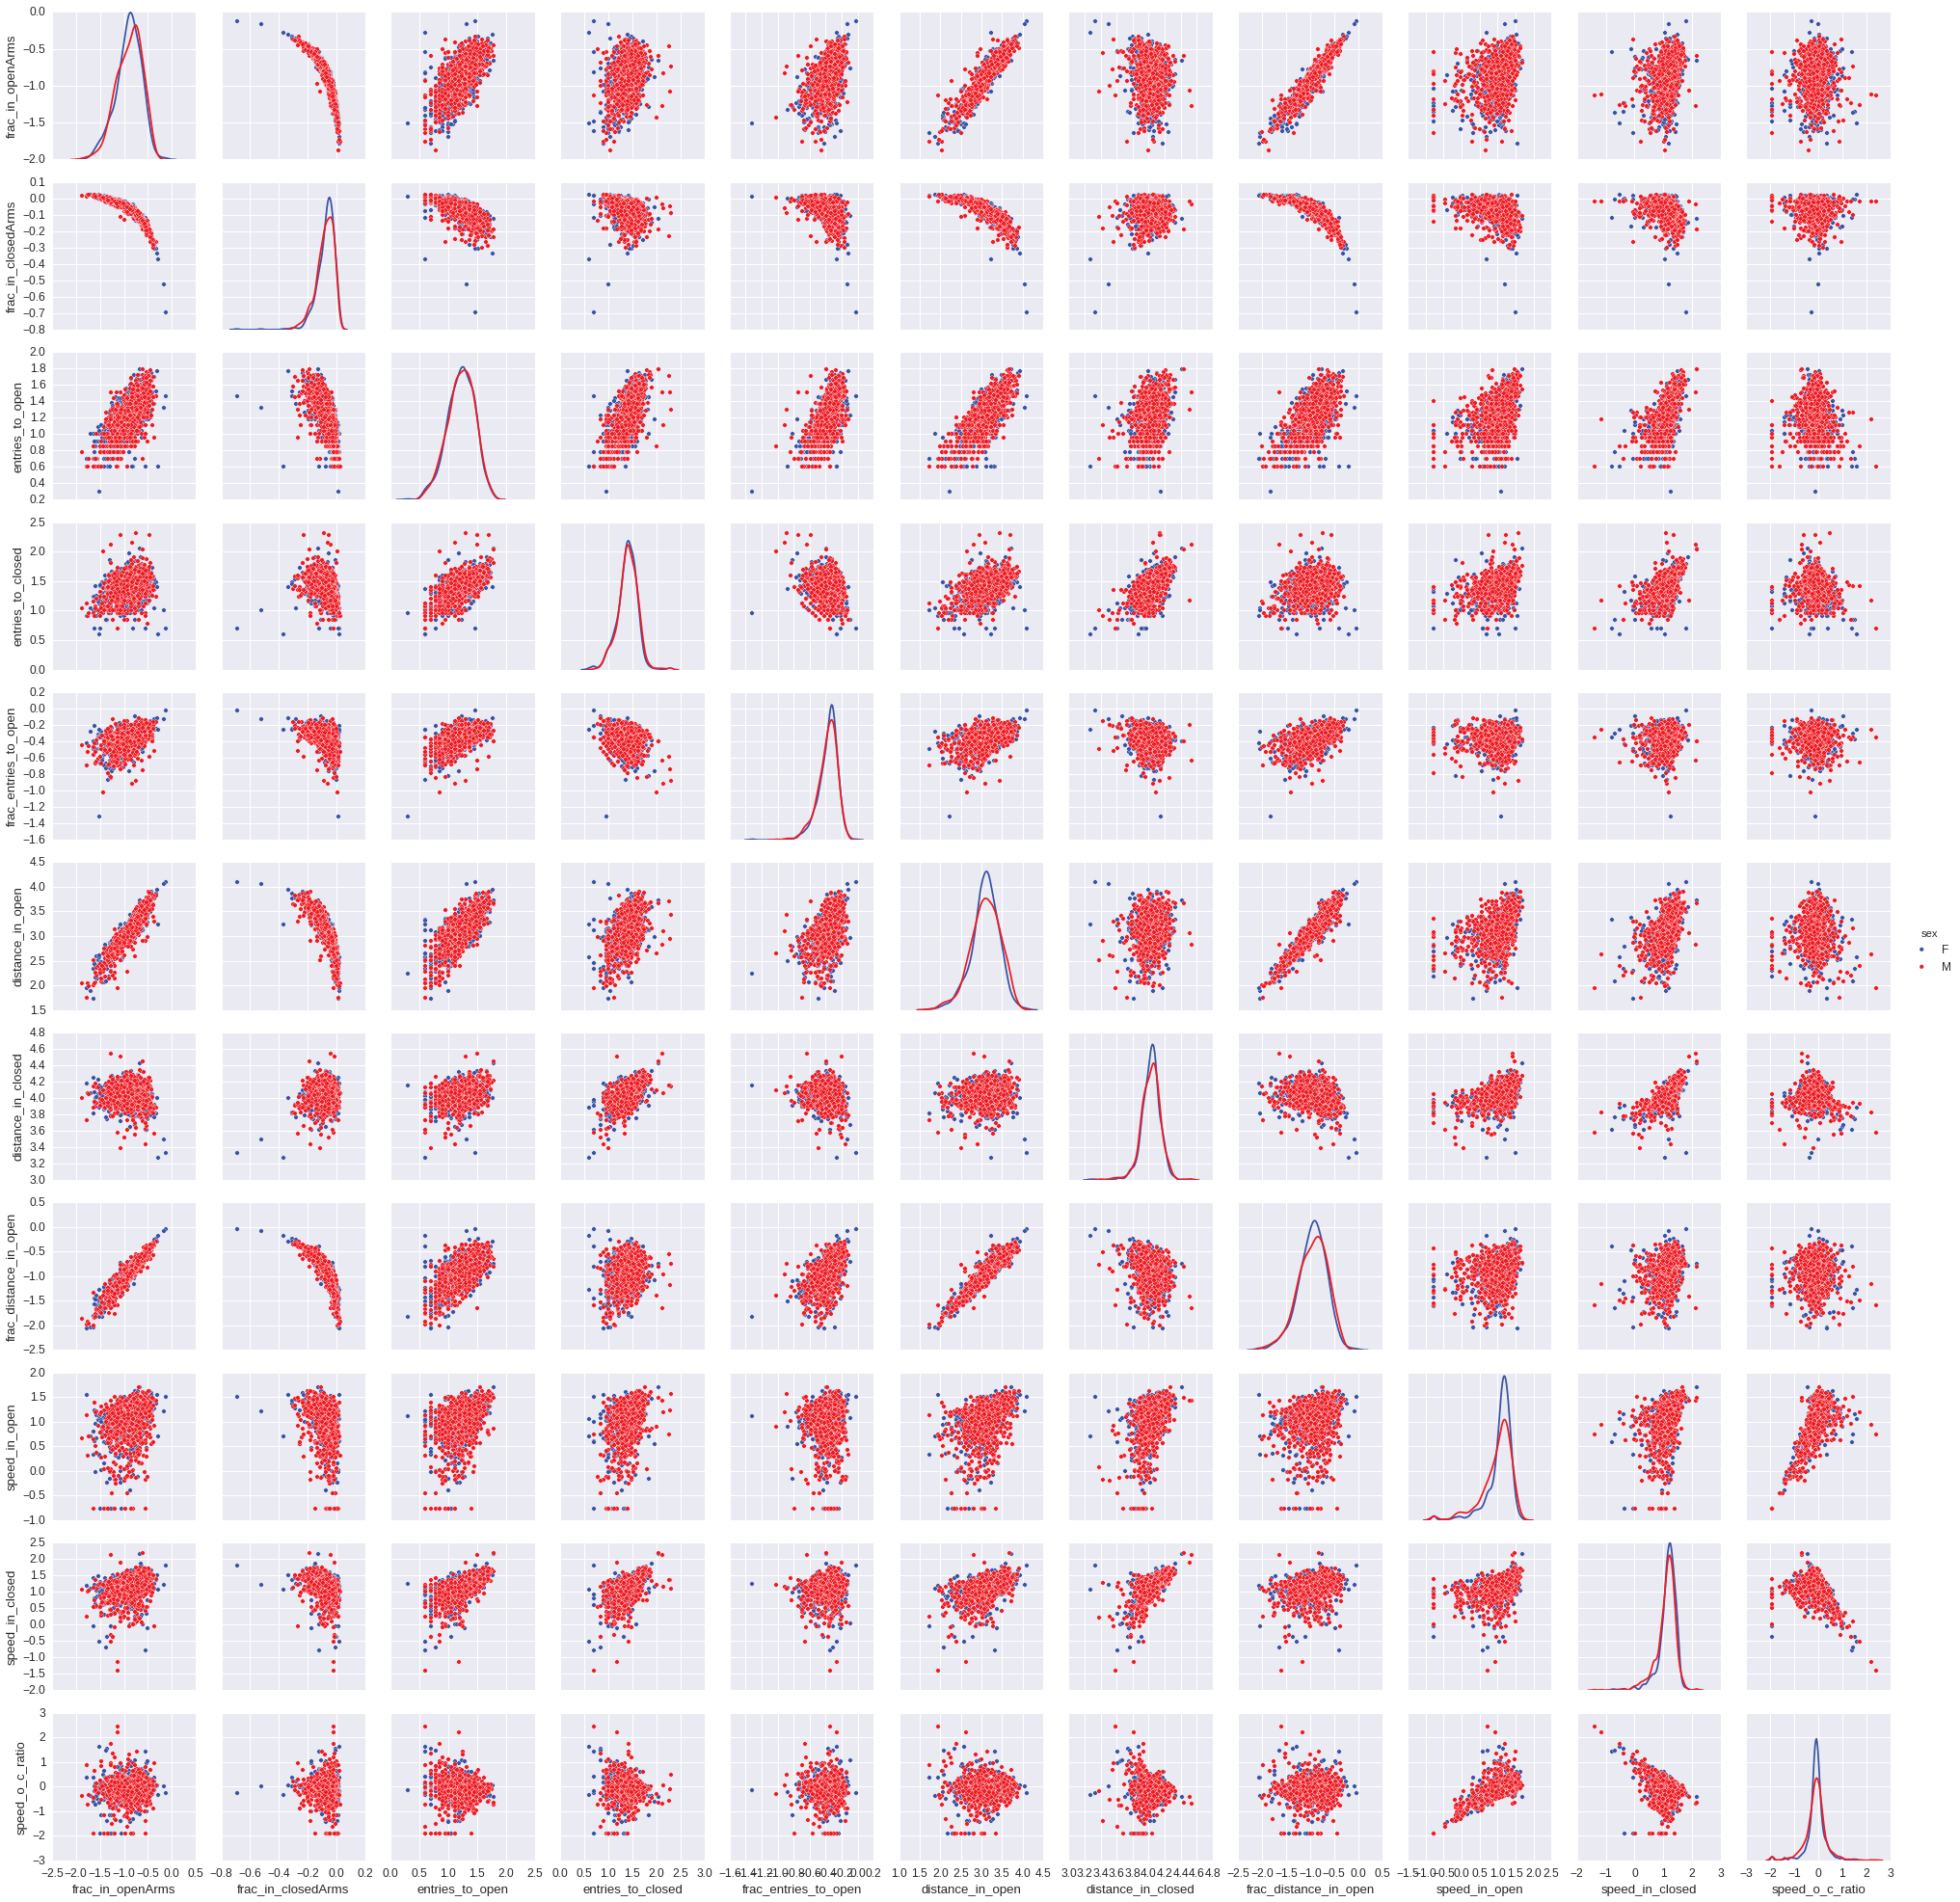

In [131]:
male_female = ["#3953A3", "#ED1C24"]
seaborn.pairplot(cross_pheno_log_pd, hue='sex', diag_kind='kde', palette=male_female);